# CAPSTONE PROJECT

## CREDIT CARD FRAUD DETECTION

##### DHARINI P & RAHUL NAIR
##### MAY 2019 COHORT

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Reading the Data

In [6]:
#df = pd.read_csv(r'C:\Users\A-9218\Downloads\creditcardfraud\creditcard.csv')
df = pd.read_csv(r'creditcard.csv')

In [7]:
df.shape

(284807, 31)

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#observe the different feature type present in the data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

- All the features are of int and float datatype
- only time and amount are actual variables
- v1 to v28 are PCA transformed variables to maintain confendiatiality of customers
- feature class tells us whether the particular transaction is fraud or not fraud

## EDA

In [10]:
## Checking for Nulls
df.isnull().sum().all()

False

There are no nulls in the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [13]:
# Lets observe the distribution of classes in the dataset

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [14]:
print(classes)
print("Normal share is",normal_share)
print("Fraud share is",fraud_share)

0    284315
1       492
Name: Class, dtype: int64
Normal share is 99.82725143693798
Fraud share is 0.1727485630620034


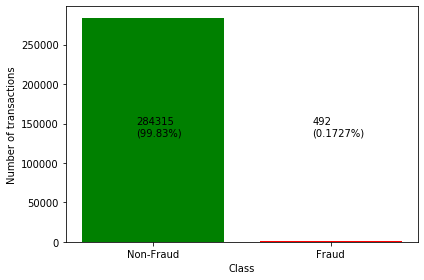

In [15]:
# lets also plot them for better visualisation

plt.bar(['Non-Fraud','Fraud'], df['Class'].value_counts(), color=['g','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

As we can see the data is highly unbalanced. 99% is non Fraud and only .17% is Fraud. 

### Time:

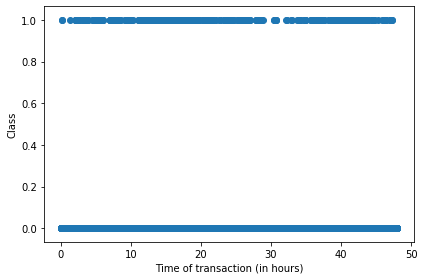

In [16]:
## We can check if there is any pattern in the the time of transaction and the Class

plt.scatter(df['Time']/(60*60), df['Class'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Class')

plt.tight_layout()
plt.show()

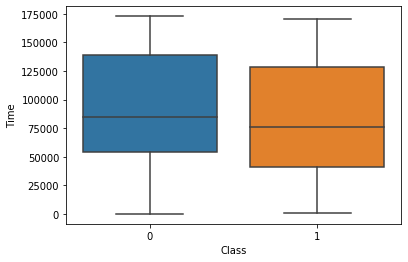

In [17]:
#Lets also visualise it using bar plot
sns.boxplot(x="Class", y="Time",data=df)

From the above plot its clear there is no pattern associated with the time and Class

In [18]:
df_fraud = df[df.Class == 1]
df_normal = df[df.Class == 0]

Text(0, 0.5, 'Frequency')

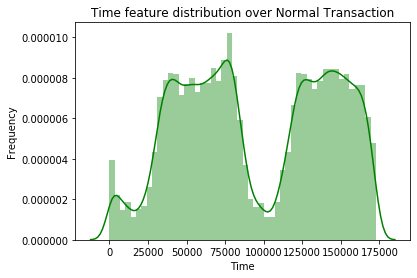

In [19]:
sns.distplot(df_normal.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

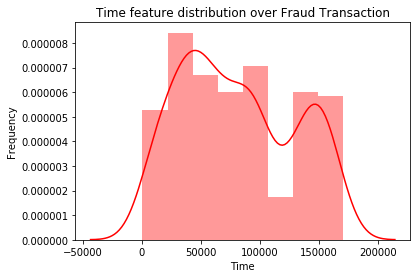

In [20]:
sns.distplot(df_fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

We cannot find anything unusual

### Amount:

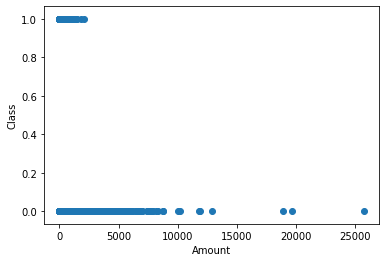

In [21]:
plt.scatter(df['Amount'], df['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

It is interesting to note that the fraud is mostly concentrated on lesser amount.

Text(0.5, 1.0, 'Transaction Amount')

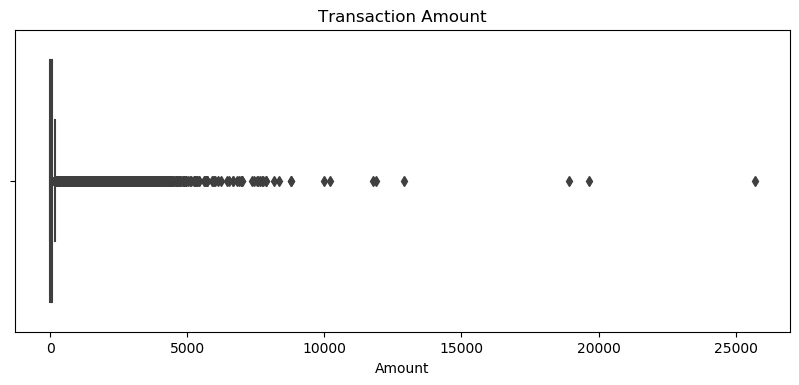

In [22]:
## Checking for Outliers in Amount
plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(df['Amount'])
plt.title('Transaction Amount')

- There are outliers present in the data and from the above plot its evident that its mostly on the right side and amount data seems right-skewed.It will be treated after train test split

In [23]:
amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


- We can see there are more than 30K outliers which consistute 11% of observation. Checking how many of them are Fraud

In [24]:
# fraud transactions in upper bound of amount column
df[df['Class']==1].where(df['Amount']>upper_bound).count()['Amount']

91

Text(0, 0.5, 'Frequency')

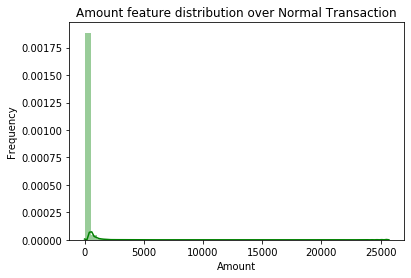

In [25]:
sns.distplot(df_normal.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

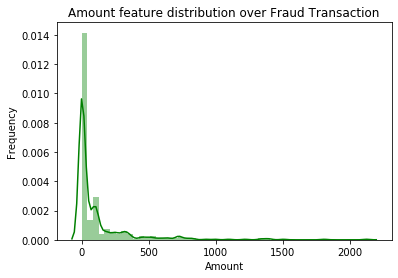

In [26]:
sns.distplot(df_fraud.Amount, color='g')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

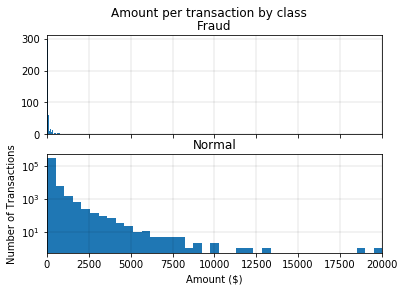

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(df_fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(df_normal.Amount, bins = bins)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

As expected the Normal has more number of transaction compared to Fraud

### Correlation:

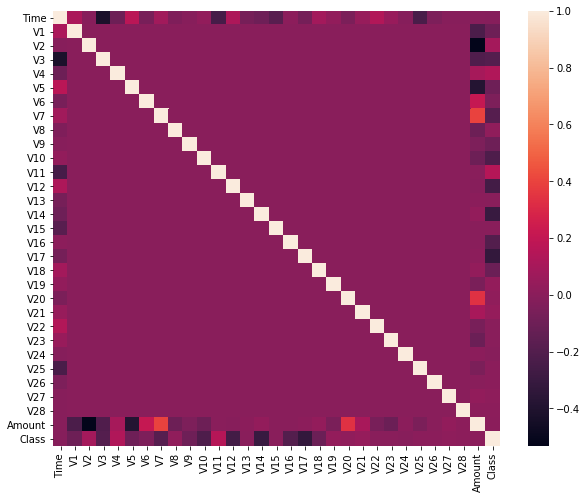

In [28]:
#Lets take a look at correlation between featues
plt.figure(figsize=(10,8))
correlation=df.corr()
sns.heatmap(correlation)

- We oserve that there is no coorelaton between variables v1 to v28
- V3 v11 v25 has some correlation with time
- v6 v7 v20 have positive coorelation with amount

### Model Training and Evaluation
we will aim for High recall on the frauds (that is the percentage of frauds correctly classified as frauds) but a low precision on the frauds is manageable. Thus, a good overall ROC Score and good recall score for the minority class will be apt.

### Splitting the data into train & test data

In [29]:
X = df.iloc[:,:-1]
y = df['Class']

In [30]:
# Using stratify parameter to split trainand test set with equal percentage of fraud transactions

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=y)

In [31]:
print(X_train.shape)
print(X_test.shape)

(199364, 30)
(85443, 30)


In [32]:
X_train['Amount'].skew()

13.520470388747102

In [33]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,143180.0,2.053474,-0.149880,-1.092234,0.420978,-0.225796,-1.159629,0.082871,-0.236532,0.733270,...,-0.313465,-0.298362,-0.779702,0.362701,-0.048183,-0.356438,0.205392,-0.075806,-0.063325,1.29
163811,116231.0,0.149477,1.112008,-0.391539,-0.557452,1.014727,-0.801985,1.042734,-0.167625,-0.200830,...,0.084311,-0.331768,-0.755443,0.079155,0.587098,-0.383245,0.110292,0.229167,0.086294,2.69
196038,131332.0,2.145379,0.215237,-2.221643,-0.067032,0.815822,-1.358596,0.843943,-0.594243,0.009745,...,-0.133286,0.153606,0.611995,-0.027494,0.824538,0.505014,0.203037,-0.083225,-0.069468,4.55
25173,33527.0,-0.354219,0.100332,1.721509,-0.884417,-0.371977,-0.062313,-0.144740,0.163123,-1.843755,...,0.295444,0.136969,0.217167,-0.014350,0.016538,-0.326120,-0.285113,0.118226,0.103791,19.95
253792,156421.0,-0.439888,1.871311,-1.106687,1.064853,1.239594,-0.633668,1.100319,0.221096,-0.917002,...,0.024939,0.059066,0.366613,-0.250861,0.494710,0.091257,-0.398552,0.330173,0.219909,6.30


In [34]:
# Percentage of fraud transaction in train and test set
print(len(y_test.loc[df['Class'] == 1]) / len(y_test))
print(len(y_train.loc[df['Class'] == 1])/len(y_train))

0.0017321489179921118
0.0017254870488152324


In [35]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variables

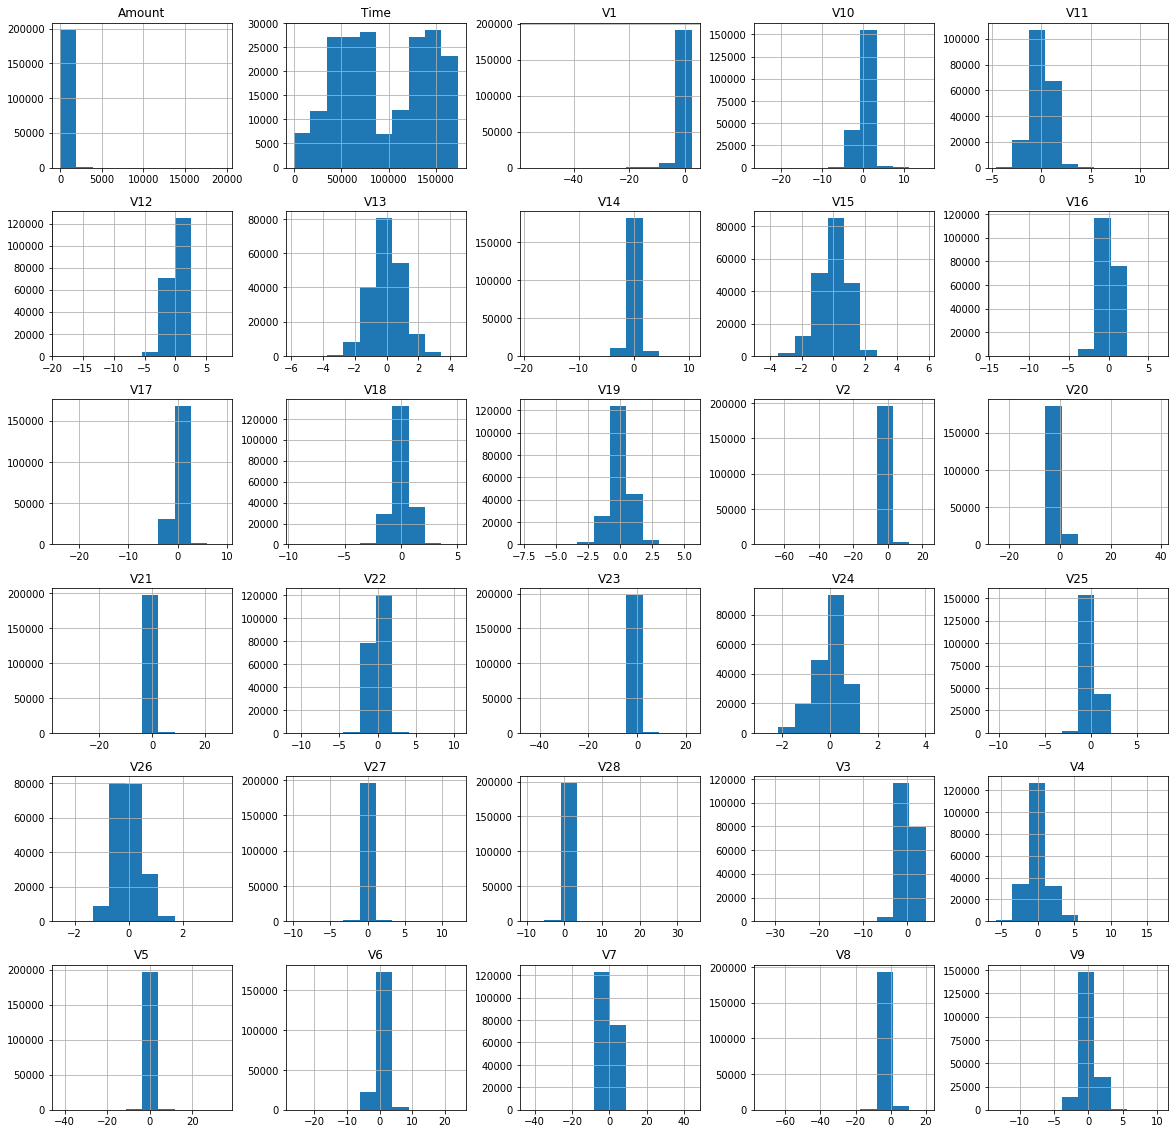

In [36]:
#Lets plot histogram to look at distribution of variables in data
X_train.hist(figsize=(20,20))
plt.show()

- Its evident that there is skewness in the features v1 to v28.

In [37]:
# lets check skewness in one variable alone:
X_train['Amount'].skew()

13.520470388747102

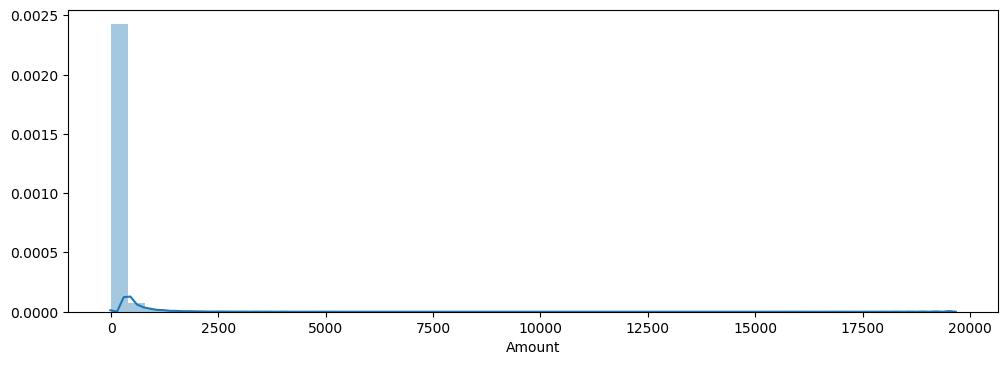

In [38]:
plt.figure(figsize=(12,4), dpi=100)
sns.distplot(X_train['Amount'])

##### As there is skewness, we will use power transformation - Yeo johnson method

In [39]:
#Lets use power transformer to handle skewness

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer(copy=False)
## Fit the PT on training data

pt.fit(X_train)                       
X_train_pt = pt.transform(X_train)

In [40]:
X_train_pt = pd.DataFrame(data=X_train_pt, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [41]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,1.000407,1.445692,-0.179859,-0.825371,0.368105,-0.166829,-0.931864,0.056497,-0.301648,0.699190,...,-0.414862,-0.395420,-1.068621,0.586820,-0.175555,-0.707411,0.509951,-0.213389,-0.185933,-1.447489
163811,0.490732,-0.168557,0.707716,-0.415595,-0.340794,0.741497,-0.589994,0.861925,-0.238026,-0.133497,...,0.107737,-0.442209,-1.036617,0.117042,1.000062,-0.756087,0.322004,0.576662,0.282991,-1.130777
196038,0.779333,1.540551,0.059204,-1.397662,0.027795,0.595882,-1.129044,0.693398,-0.616503,0.062586,...,-0.178557,0.225184,0.839662,-0.056913,1.496788,0.975261,0.505386,-0.232174,-0.205412,-0.865022
25173,-1.313086,-0.457140,-0.017893,1.329409,-0.598829,-0.273894,0.055891,-0.130663,0.084501,-1.799416,...,0.386509,0.202774,0.281492,-0.035562,-0.067283,-0.652138,-0.549520,0.285317,0.337156,-0.032385
253792,1.242536,-0.500691,1.306810,-0.833279,0.786730,0.906110,-0.435205,0.910881,0.144093,-0.834615,...,0.029514,0.097412,0.491358,-0.416204,0.814595,0.136860,-0.826228,0.845486,0.693349,-0.689227


In [42]:
X_train_pt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.000407,1.445692,-0.179859,-0.825371,0.368105,-0.166829,-0.931864,0.056497,-0.301648,0.699190,...,-0.414862,-0.395420,-1.068621,0.586820,-0.175555,-0.707411,0.509951,-0.213389,-0.185933,-1.447489
1,0.490732,-0.168557,0.707716,-0.415595,-0.340794,0.741497,-0.589994,0.861925,-0.238026,-0.133497,...,0.107737,-0.442209,-1.036617,0.117042,1.000062,-0.756087,0.322004,0.576662,0.282991,-1.130777
2,0.779333,1.540551,0.059204,-1.397662,0.027795,0.595882,-1.129044,0.693398,-0.616503,0.062586,...,-0.178557,0.225184,0.839662,-0.056913,1.496788,0.975261,0.505386,-0.232174,-0.205412,-0.865022
3,-1.313086,-0.457140,-0.017893,1.329409,-0.598829,-0.273894,0.055891,-0.130663,0.084501,-1.799416,...,0.386509,0.202774,0.281492,-0.035562,-0.067283,-0.652138,-0.549520,0.285317,0.337156,-0.032385
4,1.242536,-0.500691,1.306810,-0.833279,0.786730,0.906110,-0.435205,0.910881,0.144093,-0.834615,...,0.029514,0.097412,0.491358,-0.416204,0.814595,0.136860,-0.826228,0.845486,0.693349,-0.689227


- Lets jus take one variable and plot distribution for before transformation and after transformation

In [43]:
#after transformation
print(X_train_pt['Amount'].skew())

0.017887671053030577


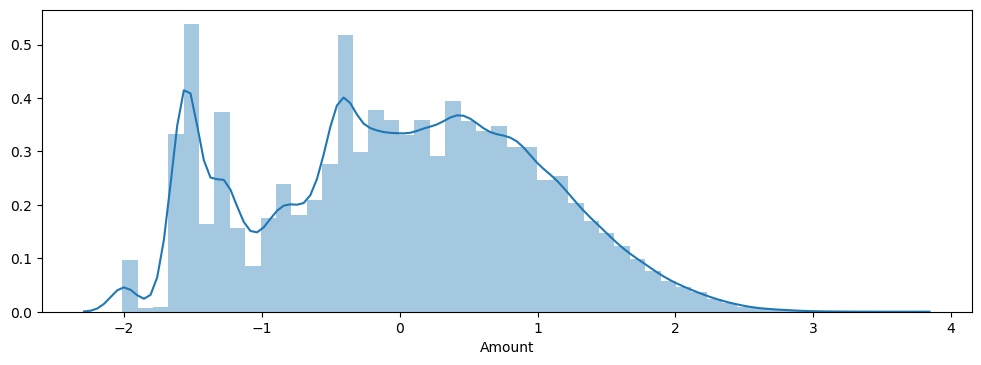

In [44]:
plt.figure(figsize=(12,4), dpi=100)
sns.distplot(X_train_pt['Amount'])

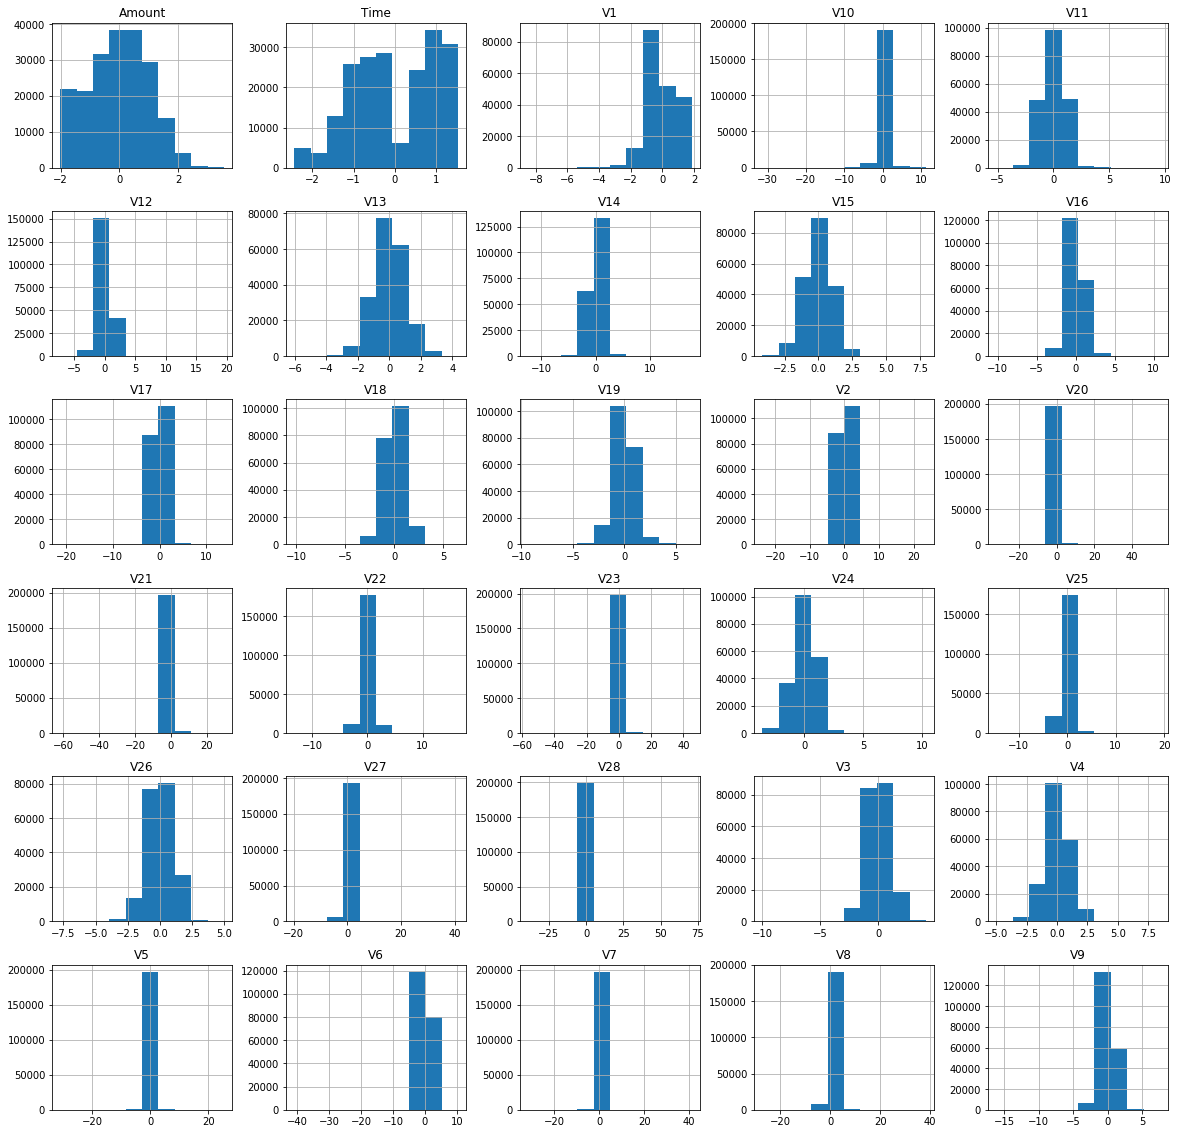

In [45]:
#Lets again plot histogram to look at distribution of variables in data after power transformation
X_train_pt.hist(figsize=(20,20))
plt.show()

- Skeweness has been handled to a certain level
- Now lets apply the transformation on test data

In [46]:
#LETS ALSO TRANSFORM TEST DATA
X_test_pt = pt.transform(X_test)

In [47]:
X_test_pt = pd.DataFrame(data=X_test_pt, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

- We will do model building using below 6 algorithms
    - Logistic regresssion
    - KNN
    - Decision trees
    - Random forest
    - SVM
    - Xgboost
    
- We will compare the models with unbalanced dataset and also after balancing data set using RANDOM OVERSAMPLING, SMOTE AND ADASYN techniques

### DATASET WITHOUT SAMPLING - IMBALANCED DATASET

In [48]:
# X_train_pt
# y_train
pd.value_counts(y_train)

0    199020
1       344
Name: Class, dtype: int64

### BALANCED DATASET - NAIVE RANDOM OVERSAMPLING

In [49]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_sample(X_train_pt, y_train)
pd.value_counts(y_ros)

1    199020
0    199020
Name: Class, dtype: int64

### BALANCED DATASET - SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smo, y_smo = sm.fit_sample(X_train_pt, y_train)
pd.value_counts(y_smo)

1    199020
0    199020
Name: Class, dtype: int64

### ### BALANCED DATASET - ADASYN


In [51]:
# apply the ADASYN over-sampling
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_sample(X_train_pt, y_train)
pd.value_counts(y_smo)

1    199020
0    199020
Name: Class, dtype: int64

In [52]:
df.shape

(284807, 31)

### logistic regression without sampling

In [53]:
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2], 'penalty':['l1','l2','None']}
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
logistic = LogisticRegression()
logreg = GridSearchCV(estimator = logistic, cv =kfolds.split(X_train_pt, y_train), param_grid = params, scoring = 'roc_auc', return_train_score  =True)
logreg.fit(X_train_pt, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/

GridSearchCV(cv=<generator object _BaseKFold.split at 0x1a1f6739d0>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1,
                               2],
                         'penalty': ['l1', 'l2', 'None']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose

In [54]:
print("Model best score:",logreg.best_score_)
print("Models best parameters:",logreg.best_params_)

Model best score: 0.9796996705425212
Models best parameters: {'C': 0.005, 'penalty': 'l2'}


In [55]:
logreg1 = LogisticRegression(penalty = 'l2', C=0.005)
#logreg1 = LogisticRegression(C=0.005)
res = logreg1.fit(X_train_pt, y_train)

### TRAIN DATA METRICS:

In [56]:
# Predictions on TRAIN set:
ytrain_pred_lr = logreg1.predict(X_train_pt)

In [57]:
confusion_train_lr = metrics.confusion_matrix(y_train,ytrain_pred_lr)
confusion_train_lr

array([[198998,     22],
       [   131,    213]])

In [58]:
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives

In [59]:
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_train,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_train,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

Accuracy_tr_lr: 1.0
Sensitivity/recall_tr_lr: 0.62
Specificity_tr_lr: 1.0
FPR_tr_lr: 0.0
Precision/positive predictive value_tr_lr: 0.91
Neg predictive value_tr_lr: 1.0
AUC_ROC_tr_lr: 0.81


### TEST DATA METRICS:

In [57]:
# Predictions on test set:
y_pred_lr = logreg1.predict(X_test_pt)

In [58]:
confusion_lr = metrics.confusion_matrix(y_test,y_pred_lr)
confusion_lr

array([[85280,    15],
       [   68,    80]])

In [59]:
TP_lr = confusion_lr[1,1] # true positive 
TN_lr = confusion_lr[0,0] # true negatives
FP_lr = confusion_lr[0,1] # false positives
FN_lr = confusion_lr[1,0] # false negatives

In [60]:
# Let's check the overall accuracy.
acc_lr = round(metrics.accuracy_score(y_test,y_pred_lr),2)
print("Accuracy_lr:",acc_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_lr = round(TP_lr / float(TP_lr+FN_lr),2)
print("Sensitivity/recall_lr:",Sensitivity_recall_lr)

# Let us calculate specificity
Specificity_lr = round(TN_lr / float(TN_lr +FP_lr),2)
print("Specificity_lr:",Specificity_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_lr = round(FP_lr/ float(TN_lr +FP_lr),2)
print("FPR_lr:",FPR_lr)

# Positive predictive value/Precision 
Precision_ppv_lr = round(TP_lr / float(TP_lr+FP_lr),2)
print("Precision/positive predictive value_lr:",Precision_ppv_lr)

# Negative predictive value
npv_lr= round(TN_lr / float(TN_lr + FN_lr),2)
print("Neg predictive value_lr:",npv_lr)

#ROC
AUC_ROC_lr = round(metrics.roc_auc_score(y_test,y_pred_lr),2)
print("AUC_ROC_lr:",AUC_ROC_lr)

Accuracy_lr: 1.0
Sensitivity/recall_lr: 0.54
Specificity_lr: 1.0
FPR_lr: 0.0
Precision/positive predictive value_lr: 0.84
Neg predictive value_lr: 1.0
AUC_ROC_lr: 0.77


In [98]:
# extracting features logistic regression - no sampling
importances_log = list(res.coef_[0])
col_names =  X_train_pt.columns

sorted_feature_importance_logreg = pd.DataFrame(sorted(zip(importances_log, list(col_names)), reverse=True))
sorted_feature_importance_logreg

,0,1
0,0.478913,V4
1,0.223955,V11
2,0.085920,V21
3,0.054429,V26
4,0.054161,V22
5,0.039819,V5
6,0.022357,V18
7,-0.002756,Time
8,-0.004226,V2
9,-0.008988,V6


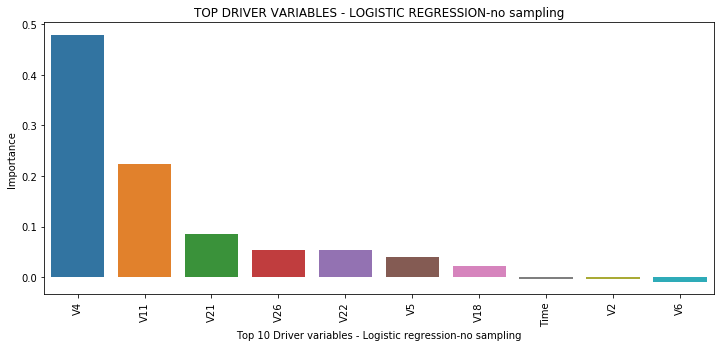

In [99]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = 1,y=0,data = sorted_feature_importance_logreg.head(10))
ax.set(xlabel = 'Top 10 Driver variables - Logistic regression-no sampling', ylabel = 'Importance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("TOP DRIVER VARIABLES - LOGISTIC REGRESSION-no sampling")
plt.show()

### logistic regression with OVERSAMPLING

In [61]:
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2], 'penalty':['l1','l2','None']}
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
logistic = LogisticRegression()
logreg = GridSearchCV(estimator = logistic, cv =kfolds.split(X_ros, y_ros), param_grid = params, scoring = 'roc_auc', return_train_score  =True)
logreg.fit(X_ros, y_ros)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/

GridSearchCV(cv=<generator object _BaseKFold.split at 0x1a28115cd0>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1,
                               2],
                         'penalty': ['l1', 'l2', 'None']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose

In [62]:
print("Model best score:",logreg.best_score_)
print("Models best parameters:",logreg.best_params_)

Model best score: 0.9886383637577116
Models best parameters: {'C': 2, 'penalty': 'l2'}


In [101]:
logreg1 = LogisticRegression(penalty = 'l2', C=2)
#logreg1 = LogisticRegression(C=0.005)
res_ros = logreg1.fit(X_ros, y_ros)

### TRAIN DATA METRICS:

In [64]:
# Predictions on TRAIN set:
ytrain_pred_lr = logreg1.predict(X_ros)

In [65]:
confusion_train_lr = metrics.confusion_matrix(y_ros,ytrain_pred_lr)
confusion_train_lr

array([[194021,   4999],
       [ 14075, 184945]])

In [66]:
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives

In [67]:
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_ros,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_ros,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

Accuracy_tr_lr: 0.95
Sensitivity/recall_tr_lr: 0.93
Specificity_tr_lr: 0.97
FPR_tr_lr: 0.03
Precision/positive predictive value_tr_lr: 0.97
Neg predictive value_tr_lr: 0.93
AUC_ROC_tr_lr: 0.95


### TEST DATA METRICS:

In [68]:
# Predictions on test set:
y_pred_lr = logreg1.predict(X_test_pt)

In [69]:
confusion_lr = metrics.confusion_matrix(y_test,y_pred_lr)
confusion_lr

array([[83182,  2113],
       [   17,   131]])

In [70]:
TP_lr = confusion_lr[1,1] # true positive 
TN_lr = confusion_lr[0,0] # true negatives
FP_lr = confusion_lr[0,1] # false positives
FN_lr = confusion_lr[1,0] # false negatives

In [71]:
# Let's check the overall accuracy.
acc_lr = round(metrics.accuracy_score(y_test,y_pred_lr),2)
print("Accuracy_lr:",acc_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_lr = round(TP_lr / float(TP_lr+FN_lr),2)
print("Sensitivity/recall_lr:",Sensitivity_recall_lr)

# Let us calculate specificity
Specificity_lr = round(TN_lr / float(TN_lr +FP_lr),2)
print("Specificity_lr:",Specificity_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_lr = round(FP_lr/ float(TN_lr +FP_lr),2)
print("FPR_lr:",FPR_lr)

# Positive predictive value/Precision 
Precision_ppv_lr = round(TP_lr / float(TP_lr+FP_lr),2)
print("Precision/positive predictive value_lr:",Precision_ppv_lr)

# Negative predictive value
npv_lr= round(TN_lr / float(TN_lr + FN_lr),2)
print("Neg predictive value_lr:",npv_lr)

#ROC
AUC_ROC_lr = round(metrics.roc_auc_score(y_test,y_pred_lr),2)
print("AUC_ROC_lr:",AUC_ROC_lr)

Accuracy_lr: 0.98
Sensitivity/recall_lr: 0.89
Specificity_lr: 0.98
FPR_lr: 0.02
Precision/positive predictive value_lr: 0.06
Neg predictive value_lr: 1.0
AUC_ROC_lr: 0.93


In [102]:
# extracting features logistic regression - ros
importances_log = list(res_ros.coef_[0])
col_names =  X_ros.columns

sorted_feature_importance_logreg = pd.DataFrame(sorted(zip(importances_log, list(col_names)), reverse=True))
sorted_feature_importance_logreg

,0,1
0,1.797936,V4
1,0.713806,V11
2,0.428449,V22
3,0.281934,V1
4,0.198403,V21
5,0.177523,V5
6,0.157920,V24
7,0.125623,V28
8,0.078500,V27
9,0.069045,V19


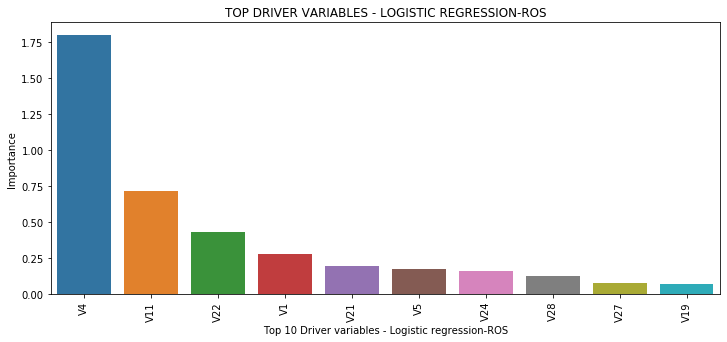

In [103]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = 1,y=0,data = sorted_feature_importance_logreg.head(10))
ax.set(xlabel = 'Top 10 Driver variables - Logistic regression-ROS', ylabel = 'Importance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("TOP DRIVER VARIABLES - LOGISTIC REGRESSION-ROS")
plt.show()

### logistic regression with SMOTE

In [72]:
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2,3,4,5,10], 'penalty':['l1','l2','None']}
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
logistic = LogisticRegression()
logreg = GridSearchCV(estimator = logistic, cv =kfolds.split(X_smo, y_smo), param_grid = params, scoring = 'roc_auc', return_train_score  =True)
logreg.fit(X_smo, y_smo)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarn

GridSearchCV(cv=<generator object _BaseKFold.split at 0x1a281154d0>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1,
                               2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2', 'None']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_

In [73]:
print("Model best score:",logreg.best_score_)
print("Models best parameters:",logreg.best_params_)

Model best score: 0.9908827349581232
Models best parameters: {'C': 10, 'penalty': 'l2'}


In [104]:
logreg1 = LogisticRegression(penalty = 'l2', C=10)
#logreg1 = LogisticRegression(C=0.005)
res_smo=logreg1.fit(X_smo, y_smo)

### TRAIN DATA METRICS:

In [75]:
# Predictions on TRAIN set:
ytrain_pred_lr = logreg1.predict(X_smo)

In [76]:
confusion_train_lr = metrics.confusion_matrix(y_smo,ytrain_pred_lr)
confusion_train_lr

array([[193679,   5341],
       [ 14172, 184848]])

In [77]:
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives

In [78]:
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_smo,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_smo,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

Accuracy_tr_lr: 0.95
Sensitivity/recall_tr_lr: 0.93
Specificity_tr_lr: 0.97
FPR_tr_lr: 0.03
Precision/positive predictive value_tr_lr: 0.97
Neg predictive value_tr_lr: 0.93
AUC_ROC_tr_lr: 0.95


### TEST DATA METRICS:

In [79]:
# Predictions on test set:
y_pred_lr = logreg1.predict(X_test_pt)

In [80]:
confusion_lr = metrics.confusion_matrix(y_test,y_pred_lr)
confusion_lr

array([[83096,  2199],
       [   16,   132]])

In [81]:
TP_lr = confusion_lr[1,1] # true positive 
TN_lr = confusion_lr[0,0] # true negatives
FP_lr = confusion_lr[0,1] # false positives
FN_lr = confusion_lr[1,0] # false negatives

In [82]:
# Let's check the overall accuracy.
acc_lr = round(metrics.accuracy_score(y_test,y_pred_lr),2)
print("Accuracy_lr:",acc_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_lr = round(TP_lr / float(TP_lr+FN_lr),2)
print("Sensitivity/recall_lr:",Sensitivity_recall_lr)

# Let us calculate specificity
Specificity_lr = round(TN_lr / float(TN_lr +FP_lr),2)
print("Specificity_lr:",Specificity_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_lr = round(FP_lr/ float(TN_lr +FP_lr),2)
print("FPR_lr:",FPR_lr)

# Positive predictive value/Precision 
Precision_ppv_lr = round(TP_lr / float(TP_lr+FP_lr),2)
print("Precision/positive predictive value_lr:",Precision_ppv_lr)

# Negative predictive value
npv_lr= round(TN_lr / float(TN_lr + FN_lr),2)
print("Neg predictive value_lr:",npv_lr)

#ROC
AUC_ROC_lr = round(metrics.roc_auc_score(y_test,y_pred_lr),2)
print("AUC_ROC_lr:",AUC_ROC_lr)

Accuracy_lr: 0.97
Sensitivity/recall_lr: 0.89
Specificity_lr: 0.97
FPR_lr: 0.03
Precision/positive predictive value_lr: 0.06
Neg predictive value_lr: 1.0
AUC_ROC_lr: 0.93


In [105]:
# extracting features logistic regression - SMOTE
importances_log = list(res_smo.coef_[0])
col_names =  X_smo.columns

sorted_feature_importance_logreg = pd.DataFrame(sorted(zip(importances_log, list(col_names)), reverse=True))
sorted_feature_importance_logreg

,0,1
0,1.880275,V4
1,0.902547,V11
2,0.468385,V1
3,0.315222,V22
4,0.288973,V5
5,0.180908,V24
6,0.155625,V21
7,0.133804,V28
8,0.129637,V27
9,0.114057,V19


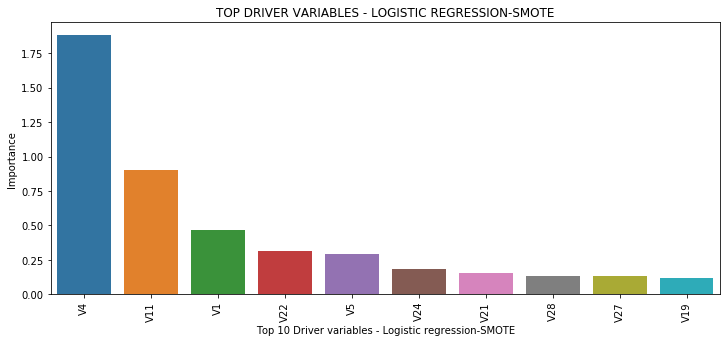

In [106]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = 1,y=0,data = sorted_feature_importance_logreg.head(10))
ax.set(xlabel = 'Top 10 Driver variables - Logistic regression-SMOTE', ylabel = 'Importance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("TOP DRIVER VARIABLES - LOGISTIC REGRESSION-SMOTE")
plt.show()

### logistic regression with ADASYN

In [83]:
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2], 'penalty':['l1','l2','None']}
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
logistic = LogisticRegression()
logreg = GridSearchCV(estimator = logistic, cv =kfolds.split(X_ada, y_ada), param_grid = params, scoring = 'roc_auc', return_train_score  =True)
logreg.fit(X_ada, y_ada)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/

GridSearchCV(cv=<generator object _BaseKFold.split at 0x1a26f48350>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1,
                               2],
                         'penalty': ['l1', 'l2', 'None']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose

In [84]:
print("Model best score:",logreg.best_score_)
print("Models best parameters:",logreg.best_params_)

Model best score: 0.9682842685340152
Models best parameters: {'C': 0.5, 'penalty': 'l2'}


In [107]:
logreg1 = LogisticRegression(penalty = 'l2', C=0.5)
#logreg1 = LogisticRegression(C=0.005)
res_ada = logreg1.fit(X_ada, y_ada)

### TRAIN DATA METRICS:

In [86]:
# Predictions on TRAIN set:
ytrain_pred_lr = logreg1.predict(X_ada)

In [87]:
confusion_train_lr = metrics.confusion_matrix(y_ada,ytrain_pred_lr)
confusion_train_lr

array([[181763,  17257],
       [ 23319, 175664]])

In [88]:
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives

In [89]:
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_ada,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_ada,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

Accuracy_tr_lr: 0.9
Sensitivity/recall_tr_lr: 0.88
Specificity_tr_lr: 0.91
FPR_tr_lr: 0.09
Precision/positive predictive value_tr_lr: 0.91
Neg predictive value_tr_lr: 0.89
AUC_ROC_tr_lr: 0.9


### TEST DATA METRICS:

In [90]:
# Predictions on test set:
y_pred_lr = logreg1.predict(X_test_pt)

In [91]:
confusion_lr = metrics.confusion_matrix(y_test,y_pred_lr)
confusion_lr

array([[78076,  7219],
       [    9,   139]])

In [92]:
TP_lr = confusion_lr[1,1] # true positive 
TN_lr = confusion_lr[0,0] # true negatives
FP_lr = confusion_lr[0,1] # false positives
FN_lr = confusion_lr[1,0] # false negatives

In [93]:
# Let's check the overall accuracy.
acc_lr = round(metrics.accuracy_score(y_test,y_pred_lr),2)
print("Accuracy_lr:",acc_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_lr = round(TP_lr / float(TP_lr+FN_lr),2)
print("Sensitivity/recall_lr:",Sensitivity_recall_lr)

# Let us calculate specificity
Specificity_lr = round(TN_lr / float(TN_lr +FP_lr),2)
print("Specificity_lr:",Specificity_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_lr = round(FP_lr/ float(TN_lr +FP_lr),2)
print("FPR_lr:",FPR_lr)

# Positive predictive value/Precision 
Precision_ppv_lr = round(TP_lr / float(TP_lr+FP_lr),2)
print("Precision/positive predictive value_lr:",Precision_ppv_lr)

# Negative predictive value
npv_lr= round(TN_lr / float(TN_lr + FN_lr),2)
print("Neg predictive value_lr:",npv_lr)

#ROC
AUC_ROC_lr = round(metrics.roc_auc_score(y_test,y_pred_lr),2)
print("AUC_ROC_lr:",AUC_ROC_lr)

Accuracy_lr: 0.92
Sensitivity/recall_lr: 0.94
Specificity_lr: 0.92
FPR_lr: 0.08
Precision/positive predictive value_lr: 0.02
Neg predictive value_lr: 1.0
AUC_ROC_lr: 0.93


In [108]:
# extracting features logistic regression - ros
importances_log = list(res_ada.coef_[0])
col_names =  X_ada.columns

sorted_feature_importance_logreg = pd.DataFrame(sorted(zip(importances_log, list(col_names)), reverse=True))
sorted_feature_importance_logreg

,0,1
0,2.132600,V4
1,1.128205,V11
2,0.570429,V1
3,0.471183,V22
4,0.220421,V24
5,0.216527,V19
6,0.211589,V5
7,0.210370,V27
8,0.205426,V28
9,0.126926,V21


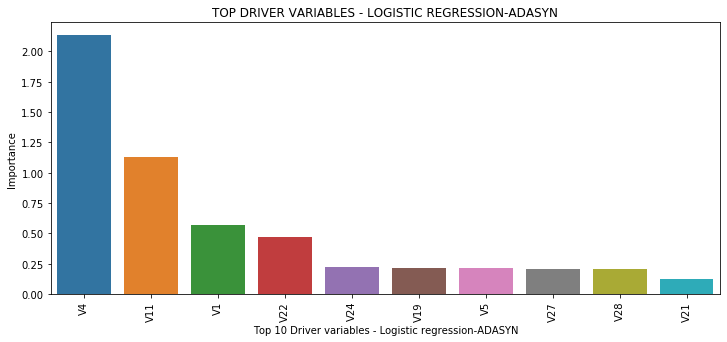

In [109]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = 1,y=0,data = sorted_feature_importance_logreg.head(10))
ax.set(xlabel = 'Top 10 Driver variables - Logistic regression-ADASYN', ylabel = 'Importance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("TOP DRIVER VARIABLES - LOGISTIC REGRESSION-ADASYN")
plt.show()

## DecisionTree

## DT without Sampling

In [93]:
### Grid Search

In [94]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200), 
    'max_features': [3,6,9,12,15]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [95]:
# Fit the grid search to the data
grid_search.fit(X_train_pt, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [96]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9992024629291992 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [131]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,max_features=15, random_state = 0,min_samples_leaf=100,min_samples_split=200)
dt_classifier.fit(X_train_pt, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [132]:
# Predictions on TRAIN set:
ytrain_pred_lr = dt_classifier.predict(X_train_pt)

In [133]:
confusion_train_lr = metrics.confusion_matrix(y_train,ytrain_pred_lr)
print(confusion_train_lr)
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_train,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_train,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

[[198950     70]
 [   108    236]]
Accuracy_tr_lr: 1.0
Sensitivity/recall_tr_lr: 0.69
Specificity_tr_lr: 1.0
FPR_tr_lr: 0.0
Precision/positive predictive value_tr_lr: 0.77
Neg predictive value_tr_lr: 1.0
AUC_ROC_tr_lr: 0.84


In [134]:
# Predicting  Test
predictions_dt1 = dt_classifier.predict(X_test_pt)

In [135]:
cm_decision = confusion_matrix(y_test, predictions_dt1)
print("confusion Marix : \n", cm_decision)

confusion Marix : 
 [[85251    44]
 [   42   106]]


#### DT without Sampling Results

Sensitivity/recall_df :  0.72
Specificity_df :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.71      0.72      0.71       148

    accuracy                           1.00     85443
   macro avg       0.85      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test dataset 99.9%
ROC for the test dataset 85.8%


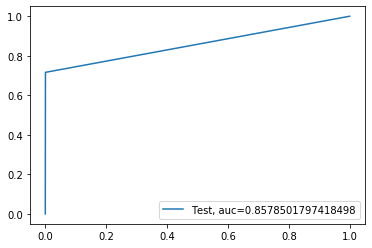

In [136]:
#test data metrics
#preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_df = round((cm_decision[1,1]/(cm_decision[1,0]+cm_decision[1,1])),2)
print('Sensitivity/recall_df : ', sensitivity_df )


specificity_df = round((cm_decision[0,0]/(cm_decision[0,0]+cm_decision[0,1])),2)
print('Specificity_df : ', specificity_df)

print(classification_report(y_test, predictions_dt1))
accuracy = metrics.accuracy_score(y_test, predictions_dt1)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_dt1)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

## DT with Random Over sampling

In [101]:
#t=dtree_grid_search(X_ros, y_ros,10)
#print(t)
grid_search.fit(X_ros, y_ros)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 561.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 564.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [102]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9951311425987338 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [137]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,max_features=12, random_state = 0,min_samples_leaf=100,min_samples_split=400)
dt_classifier.fit(X_ros, y_ros)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [138]:
# Predictions on TRAIN set:
ytrain_pred_lr = dt_classifier.predict(X_ros)
confusion_train_lr = metrics.confusion_matrix(y_ros,ytrain_pred_lr)
print(confusion_train_lr)
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_ros,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_ros,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

[[197454   1566]
 [  1788 197232]]
Accuracy_tr_lr: 0.99
Sensitivity/recall_tr_lr: 0.99
Specificity_tr_lr: 0.99
FPR_tr_lr: 0.01
Precision/positive predictive value_tr_lr: 0.99
Neg predictive value_tr_lr: 0.99
AUC_ROC_tr_lr: 0.99


In [139]:
# Predicting test
predictions_dt2 = dt_classifier.predict(X_test_pt)

In [140]:
### Testing

In [141]:
cm_decision = confusion_matrix(y_test, predictions_dt2)
print("confusion Marix : \n", cm_decision)

confusion Marix : 
 [[84615   680]
 [   23   125]]


Sensitivity/recall_rf :  0.84
Specificity_rf :  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.16      0.84      0.26       148

    accuracy                           0.99     85443
   macro avg       0.58      0.92      0.63     85443
weighted avg       1.00      0.99      0.99     85443

Accuracy for the test dataset 99.2%
ROC for the test dataset 91.8%


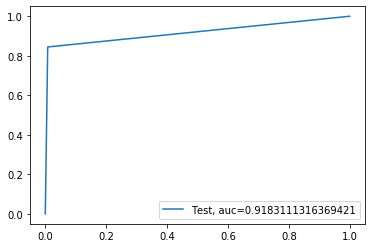

In [142]:
#test data metrics
#preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_dfo = round((cm_decision[1,1]/(cm_decision[1,0]+cm_decision[1,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_dfo )

specificity_dfo = round((cm_decision[0,0]/(cm_decision[0,0]+cm_decision[0,1])),2)
print('Specificity_rf : ', specificity_dfo)

print(classification_report(y_test, predictions_dt2))
accuracy = metrics.accuracy_score(y_test, predictions_dt2)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_dt2)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

### DT WITH SMOTE

In [109]:
#t=dtree_grid_search(X_ros, y_ros,10)
#print(t)
grid_search.fit(X_smo, y_smo)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 13.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [110]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9814717113857904 using {'criterion': 'gini', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [143]:
dt_classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=10,max_features=15, random_state = 0,min_samples_leaf=100,min_samples_split=200)
dt_classifier.fit(X_smo, y_smo)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [144]:
# Predictions on TRAIN set:
ytrain_pred_lr = dt_classifier.predict(X_smo)
confusion_train_lr = metrics.confusion_matrix(y_smo,ytrain_pred_lr)
print(confusion_train_lr)
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_smo,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_smo,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

[[196196   2824]
 [  2786 196234]]
Accuracy_tr_lr: 0.99
Sensitivity/recall_tr_lr: 0.99
Specificity_tr_lr: 0.99
FPR_tr_lr: 0.01
Precision/positive predictive value_tr_lr: 0.99
Neg predictive value_tr_lr: 0.99
AUC_ROC_tr_lr: 0.99


In [145]:
# Predicting 
predictions_dt3 = dt_classifier.predict(X_test_pt)

In [146]:
cm_decision = confusion_matrix(y_test, predictions_dt3)
print("confusion Marix : \n", cm_decision)

confusion Marix : 
 [[84068  1227]
 [   20   128]]


#### SMOTE TEST Results

Sensitivity/recall_rf :  0.86
Specificity_rf :  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.09      0.86      0.17       148

    accuracy                           0.99     85443
   macro avg       0.55      0.93      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Accuracy for the test dataset 98.5%
ROC for the test dataset 92.5%


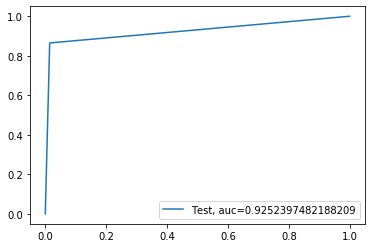

In [147]:
#test data metrics
#preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_dfsm = round((cm_decision[1,1]/(cm_decision[1,0]+cm_decision[1,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_dfsm )

specificity_dfsm = round((cm_decision[0,0]/(cm_decision[0,0]+cm_decision[0,1])),2)
print('Specificity_rf : ', specificity_dfsm)

print(classification_report(y_test, predictions_dt3))
accuracy = metrics.accuracy_score(y_test, predictions_dt3)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_dt3)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

### DT WITH ADASYN

In [115]:

grid_search.fit(X_ada,y_ada)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 12.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [116]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.922173971604933 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 300, 'min_samples_split': 400}


In [148]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,max_features=9, random_state = 0,min_samples_leaf=100,min_samples_split=400)
dt_classifier.fit(X_ada,y_ada)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [149]:
# Predictions on TRAIN set:
ytrain_pred_lr = dt_classifier.predict(X_ada)
confusion_train_lr = metrics.confusion_matrix(y_ada,ytrain_pred_lr)
print(confusion_train_lr)
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_ada,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_ada,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

[[189175   9845]
 [  6402 192581]]
Accuracy_tr_lr: 0.96
Sensitivity/recall_tr_lr: 0.97
Specificity_tr_lr: 0.95
FPR_tr_lr: 0.05
Precision/positive predictive value_tr_lr: 0.95
Neg predictive value_tr_lr: 0.97
AUC_ROC_tr_lr: 0.96


In [150]:
# Predicting 
predictions_dt4 = dt_classifier.predict(X_test_pt)

In [151]:
cm_decision = confusion_matrix(y_test, predictions_dt4)
print("confusion Marix : \n", cm_decision)

confusion Marix : 
 [[81229  4066]
 [   18   130]]


Sensitivity/recall_rf :  0.88
Specificity_rf :  0.95
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.88      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.95      0.97     85443

Accuracy for the test dataset 95.2%
ROC for the test dataset 91.5%


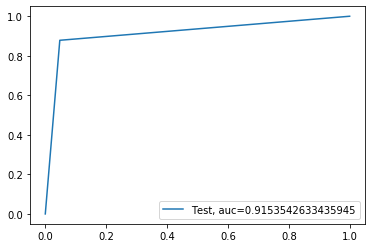

In [152]:
#test data metrics
#preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_dfad = round((cm_decision[1,1]/(cm_decision[1,0]+cm_decision[1,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_dfad )

specificity_dfad = round((cm_decision[0,0]/(cm_decision[0,0]+cm_decision[0,1])),2)
print('Specificity_rf : ', specificity_dfad)

print(classification_report(y_test, predictions_dt4))
accuracy = metrics.accuracy_score(y_test, predictions_dt4)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_dt4)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

## Random Forest

### RF Without Sampling

In [145]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [10,15],
    'min_samples_leaf': range(100,200),
    'min_samples_split': range(200,500,), 
    'max_features': [3,8,15]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced_subsample")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [123]:
# Fit the grid search to the data
grid_search.fit(X_train_pt, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 74.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 291.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=...s=None,
                                              oob_score=False,
                                          

In [124]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9990218895334276 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [153]:
rfc = RandomForestClassifier(bootstrap=True,
                             criterion='entropy',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=3,
                             n_estimators=1600)

In [154]:
# fit
fit_Trained_RFC=rfc.fit(X_train_pt, y_train)

In [155]:
# Predictions on TRAIN set:
ytrain_pred_lr = rfc.predict(X_train_pt)
confusion_train_lr = metrics.confusion_matrix(y_train,ytrain_pred_lr)
print(confusion_train_lr)
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_train,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_train,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

[[198871    149]
 [     9    335]]
Accuracy_tr_lr: 1.0
Sensitivity/recall_tr_lr: 0.97
Specificity_tr_lr: 1.0
FPR_tr_lr: 0.0
Precision/positive predictive value_tr_lr: 0.69
Neg predictive value_tr_lr: 1.0
AUC_ROC_tr_lr: 0.99


In [156]:
# predictions on test set
predictions_rf1 = fit_Trained_RFC.predict(X_test_pt)
cm_decision = confusion_matrix(y_test, predictions_rf1)
print(cm_decision)

[[85223    72]
 [   21   127]]


Sensitivity/recall_rf :  0.86
Specificity_rf :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.64      0.86      0.73       148

    accuracy                           1.00     85443
   macro avg       0.82      0.93      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test dataset 99.9%
ROC for the test dataset 92.9%


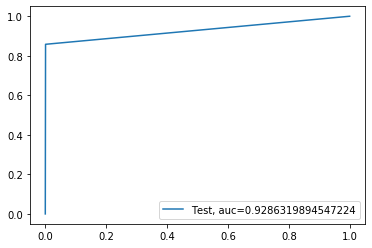

In [157]:
#test data metrics
#preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_rf_pca = round((cm_decision[1,1]/(cm_decision[1,0]+cm_decision[1,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_rf_pca )

specificity_rf_pca = round((cm_decision[0,0]/(cm_decision[0,0]+cm_decision[0,1])),2)
print('Specificity_rf : ', specificity_rf_pca)

print(classification_report(y_test, predictions_rf1))
accuracy = metrics.accuracy_score(y_test, predictions_rf1)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_rf1)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

### Over sampling on Random Forest

In [134]:
# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 102.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 959.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=...s=None,
                                              oob_score=False,
                                          

In [135]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9994020701437041 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [49]:
rfc = RandomForestClassifier(bootstrap=True,
                             criterion='entropy',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=1600)

In [50]:
# fit
fit_Trained_RFC=rfc.fit(X_ros, y_ros)

In [51]:
# Predictions on TRAIN set:
ytrain_pred_lr = rfc.predict(X_ros)
confusion_train_lr = metrics.confusion_matrix(y_ros,ytrain_pred_lr)
print(confusion_train_lr)
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_ros,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_ros,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

[[198838    182]
 [     0 199020]]
Accuracy_tr_lr: 1.0
Sensitivity/recall_tr_lr: 1.0
Specificity_tr_lr: 1.0
FPR_tr_lr: 0.0
Precision/positive predictive value_tr_lr: 1.0
Neg predictive value_tr_lr: 1.0
AUC_ROC_tr_lr: 1.0


In [52]:

# predictions on test set
predictions_rf2 = fit_Trained_RFC.predict(X_test_pt)
cm_decision = confusion_matrix(y_test, predictions_rf2)
print(cm_decision)

[[85197    98]
 [   21   127]]


Sensitivity/recall_rf :  0.86
Specificity_rf :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.56      0.86      0.68       148

    accuracy                           1.00     85443
   macro avg       0.78      0.93      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test dataset 99.9%
ROC for the test dataset 92.8%


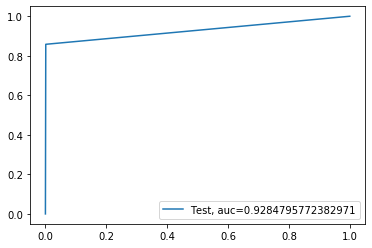

In [53]:
#test data metrics
#preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_rf_pca = round((cm_decision[1,1]/(cm_decision[1,0]+cm_decision[1,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_rf_pca )

specificity_rf_pca = round((cm_decision[0,0]/(cm_decision[0,0]+cm_decision[0,1])),2) 
print('Specificity_rf : ', specificity_rf_pca)

print(classification_report(y_test, predictions_rf2))
accuracy = metrics.accuracy_score(y_test, predictions_rf2)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_rf2)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

### SMOTE Random Forest

In [139]:
# Fit the grid search to the data
grid_search.fit(X_smo, y_smo)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 178.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 417.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=...s=None,
                                              oob_score=False,
                                          

In [140]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9917319867350015 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [54]:
rfc = RandomForestClassifier(bootstrap=True,
                             criterion='entropy',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=1600)

# fit
fit_Trained_RFC=rfc.fit(X_smo, y_smo)


In [55]:
# Predictions on TRAIN set:
ytrain_pred_lr = rfc.predict(X_smo)
confusion_train_lr = metrics.confusion_matrix(y_smo,ytrain_pred_lr)
print(confusion_train_lr)
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_smo,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_smo,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

[[198512    508]
 [  2669 196351]]
Accuracy_tr_lr: 0.99
Sensitivity/recall_tr_lr: 0.99
Specificity_tr_lr: 1.0
FPR_tr_lr: 0.0
Precision/positive predictive value_tr_lr: 1.0
Neg predictive value_tr_lr: 0.99
AUC_ROC_tr_lr: 0.99


In [56]:
# predictions on test set
predictions_rf3 = fit_Trained_RFC.predict(X_test_pt)
cm_decision = confusion_matrix(y_test, predictions_rf3)
print(cm_decision)

[[85068   227]
 [   20   128]]


Sensitivity/recall_rf :  0.86
Specificity_rf :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.36      0.86      0.51       148

    accuracy                           1.00     85443
   macro avg       0.68      0.93      0.75     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test dataset 99.7%
ROC for the test dataset 93.1%


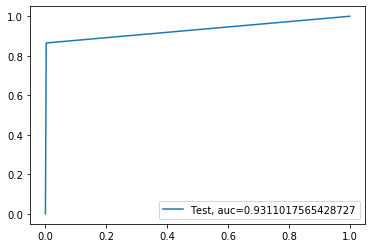

In [58]:
#test data metrics
#preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_rf_pca = round((cm_decision[1,1]/(cm_decision[1,0]+cm_decision[1,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_rf_pca )

specificity_rf_pca = round((cm_decision[0,0]/(cm_decision[0,0]+cm_decision[0,1])),2) 
print('Specificity_rf : ', specificity_rf_pca)

print(classification_report(y_test, predictions_rf3))
accuracy = metrics.accuracy_score(y_test, predictions_rf3)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_rf3)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

### ADA Random Forest

In [ ]:
# Fit the grid search to the data
#grid_search.fit(X_ada,y_ada)

Fitting 3 folds for each of 360000 candidates, totalling 1080000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 92.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 201.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 371.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 579.4min


In [51]:
# printing the optimal accuracy score and hyperparameters
#print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [59]:
rfc = RandomForestClassifier(bootstrap=True,
                             criterion='entropy',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=1600)

# fit
fit_Trained_RFC=rfc.fit(X_ada,y_ada)

In [60]:
# Predictions on TRAIN set:
ytrain_pred_lr = rfc.predict(X_ada)
confusion_train_lr = metrics.confusion_matrix(y_ada,ytrain_pred_lr)
print(confusion_train_lr)
TP_tr_lr = confusion_train_lr[1,1] # true positive 
TN_tr_lr = confusion_train_lr[0,0] # true negatives
FP_tr_lr = confusion_train_lr[0,1] # false positives
FN_tr_lr = confusion_train_lr[1,0] # false negatives
# Let's check the overall accuracy.
acc_tr_lr = round(metrics.accuracy_score(y_ada,ytrain_pred_lr),2)
print("Accuracy_tr_lr:",acc_tr_lr)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FN_tr_lr),2)
print("Sensitivity/recall_tr_lr:",Sensitivity_recall_tr_lr)

# Let us calculate specificity
Specificity_tr_lr = round(TN_tr_lr / float(TN_tr_lr +FP_tr_lr),2)
print("Specificity_tr_lr:",Specificity_tr_lr)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_tr_lr = round(FP_tr_lr/ float(TN_tr_lr +FP_tr_lr),2)
print("FPR_tr_lr:",FPR_tr_lr)

# Positive predictive value/Precision 
Precision_ppv_tr_lr = round(TP_tr_lr / float(TP_tr_lr+FP_tr_lr),2)
print("Precision/positive predictive value_tr_lr:",Precision_ppv_tr_lr)

# Negative predictive value
npv_tr_lr= round(TN_tr_lr / float(TN_tr_lr + FN_tr_lr),2)
print("Neg predictive value_tr_lr:",npv_tr_lr)

#ROC
AUC_ROC_tr_lr = round(metrics.roc_auc_score(y_ada,ytrain_pred_lr),2)
print("AUC_ROC_tr_lr:",AUC_ROC_tr_lr)

[[197086   1934]
 [   487 198496]]
Accuracy_tr_lr: 0.99
Sensitivity/recall_tr_lr: 1.0
Specificity_tr_lr: 0.99
FPR_tr_lr: 0.01
Precision/positive predictive value_tr_lr: 0.99
Neg predictive value_tr_lr: 1.0
AUC_ROC_tr_lr: 0.99


In [61]:
# predictions on test set
predictions_rf4 = fit_Trained_RFC.predict(X_test_pt)
cm_decision = confusion_matrix(y_test, predictions_rf4)
print(cm_decision)

[[84478   817]
 [   19   129]]


Sensitivity/recall_rf :  0.87
Specificity_rf :  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.87      0.24       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443

Accuracy for the test dataset 99.0%
ROC for the test dataset 93.1%


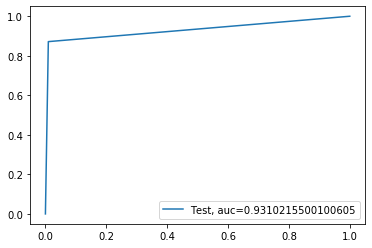

In [64]:
#test data metrics
#preds_probs_RFC=fit_Trained_RFC.predict_proba(df_test_pca)[:,1]

sensitivity_rf_pca = round((cm_decision[1,1]/(cm_decision[1,0]+cm_decision[1,1])),2)
print('Sensitivity/recall_rf : ', sensitivity_rf_pca )

specificity_rf_pca = round((cm_decision[0,0]/(cm_decision[0,0]+cm_decision[0,1])),2) 
print('Specificity_rf : ', specificity_rf_pca)


print(classification_report(y_test, predictions_rf4))
accuracy = metrics.accuracy_score(y_test, predictions_rf4)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_rf4)
roc_auc_rf_pca = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_rf_pca))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc_rf_pca))
plt.legend(loc=4)
plt.show()

#### KNN Classification SMOTE Data

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
knn_model = KNeighborsClassifier(n_neighbors= 4, n_jobs= -1)
knn_model.fit(X_smo, y_smo)
pred = knn_model.predict(X_test)
print ("ROC AUC Score=",roc_auc_score(y_test, pred))
print ("Classification Report:")
print (classification_report(y_test, pred))

ROC AUC Score= 0.9319107136915918
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.59      0.86      0.70       148

    accuracy                           1.00     85443
   macro avg       0.79      0.93      0.85     85443
weighted avg       1.00      1.00      1.00     85443



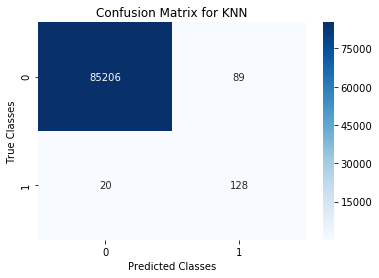

In [128]:
cm = pd.DataFrame(confusion_matrix(y_test, pred))
plt.figure()
plt.title("Confusion Matrix for KNN")
sns.heatmap(cm, cmap= "Blues", annot= True, fmt= "d")
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()

### XGBoost

In [66]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

In [169]:
# fit model on training data with default hyperparameters
xg_model = XGBClassifier()
xg_model.fit(X_train_pt, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [177]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_xg1 = xg_model.predict(X_test_pt)
y_pred_xg = xg_model.predict_proba(X_test_pt)
y_pred_xg[:10]

array([[9.9861747e-01, 1.3825333e-03],
       [9.9807459e-01, 1.9253890e-03],
       [9.9995422e-01, 4.5747107e-05],
       [9.9992925e-01, 7.0727503e-05],
       [9.9992859e-01, 7.1388233e-05],
       [9.9992061e-01, 7.9386715e-05],
       [9.9993783e-01, 6.2177132e-05],
       [9.9991930e-01, 8.0716476e-05],
       [9.9994123e-01, 5.8769041e-05],
       [9.9995190e-01, 4.8113379e-05]], dtype=float32)

In [178]:
confusion_xg = metrics.confusion_matrix(y_test,y_pred_xg1)
confusion_xg

array([[85280,    15],
       [   34,   114]], dtype=int64)

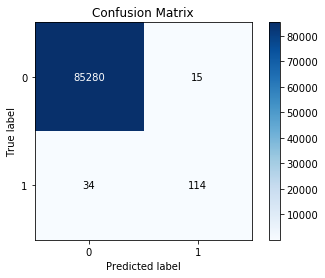

In [181]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xg1)

In [182]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xg[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 97.71%


#### Lets tune the hyperparameters using stratified k-fold cv and find the optimal hyperparameters using grid search cv

In [194]:
# hyperparameter tuning with XGBoost
# GridSearchCV to find optimal min_samples_split

# creating a KFold object 
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3,0.7,0.9]
             }          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_xg = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc',n_iter = 5,
                        cv = kfolds.split(X_train_pt, y_train), 
                        verbose = 0,random_state=1,
                        return_train_score=True)    

In [195]:
# fit the model
model_cv_xg.fit(X_train_pt, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002140E914660>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=2, min_child_weight=1,
                                           missing=None, n_estimators=200,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
        

In [196]:
# cv results
cv_results_xg = pd.DataFrame(model_cv_xg.cv_results_)
cv_results_xg

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,96.759396,36.872151,0.265597,0.111712,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.978440,0.965023,0.984908,...,0.977140,0.006695,3,0.999952,0.999943,0.999980,0.999943,0.999933,0.999950,0.000016
1,53.150126,5.734535,0.159335,0.006250,0.7,0.2,"{'subsample': 0.7, 'learning_rate': 0.2}",0.982110,0.966635,0.985346,...,0.977301,0.007465,2,0.999971,0.999971,0.999976,0.999896,0.999986,0.999960,0.000032
2,48.770383,0.128498,0.167201,0.005922,0.7,0.6,"{'subsample': 0.7, 'learning_rate': 0.6}",0.978212,0.965008,0.982743,...,0.978199,0.007700,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,38.905245,0.186045,0.160811,0.005762,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.974152,0.952610,0.981382,...,0.974985,0.011915,4,0.999518,0.999883,0.999756,0.999742,0.999627,0.999705,0.000124
4,38.614077,0.318486,0.176448,0.014182,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.959813,0.971427,0.972523,...,0.969128,0.011478,5,0.999992,0.999995,0.999994,0.999994,0.999998,0.999995,0.000002


In [197]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xg.best_score_,'using',model_cv_xg.best_params_)

We can get accuracy of 0.9781989731354568 using {'subsample': 0.7, 'learning_rate': 0.6}


The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

Let's build a final model with the chosen hyperparameters

In [198]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.7,
         'objective':'binary:logistic'}

In [200]:
# fit model on training data
xg_optimum = XGBClassifier(params = params)
xg_optimum.fit(X_train_pt, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.7},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [201]:
# predictions on TRAIN set
y_pred_xg_train1 = xg_optimum.predict(X_train_pt)
y_pred_xg_train = xg_optimum.predict_proba(X_train_pt)
y_pred_xg_train[:10]

array([[9.9994260e-01, 5.7375939e-05],
       [9.9990994e-01, 9.0038455e-05],
       [9.9994677e-01, 5.3234799e-05],
       [9.9990475e-01, 9.5258001e-05],
       [9.9965489e-01, 3.4509177e-04],
       [9.9994123e-01, 5.8769041e-05],
       [9.9768633e-01, 2.3136749e-03],
       [9.9995226e-01, 4.7738158e-05],
       [9.9798423e-01, 2.0157853e-03],
       [9.9995881e-01, 4.1178926e-05]], dtype=float32)

In [202]:
# predictions on test set
y_pred_xg_test1 = xg_optimum.predict(X_test_pt)
y_pred_xg_test = xg_optimum.predict_proba(X_test_pt)
y_pred_xg_test[:10]

array([[9.9861747e-01, 1.3825333e-03],
       [9.9807459e-01, 1.9253890e-03],
       [9.9995422e-01, 4.5747107e-05],
       [9.9992925e-01, 7.0727503e-05],
       [9.9992859e-01, 7.1388233e-05],
       [9.9992061e-01, 7.9386715e-05],
       [9.9993783e-01, 6.2177132e-05],
       [9.9991930e-01, 8.0716476e-05],
       [9.9994123e-01, 5.8769041e-05],
       [9.9995190e-01, 4.8113379e-05]], dtype=float32)

#### TRAIN DATA METRICS:

In [203]:
# roc_auc train
auc_xg_train = metrics.roc_auc_score(y_train, y_pred_xg_train[:, 1])

print("AUC: %.2f%%" % (auc_xg_train * 100.0))

AUC: 99.83%


In [204]:
confusion_xg_train = metrics.confusion_matrix(y_train,y_pred_xg_train1 )
confusion_xg_train

array([[199015,      5],
       [    57,    287]], dtype=int64)

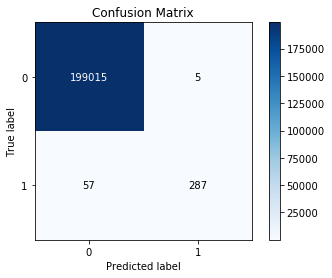

In [205]:
skplt.metrics.plot_confusion_matrix(y_train,y_pred_xg_train1)

In [206]:
# Let's check the overall accuracy.
print("XGBOOST TRAIN RESULTS:")
print("Accuracy_train:",round(metrics.accuracy_score(y_train,y_pred_xg_train1),2))

sensitivity_xg_train = round((confusion_xg_train[0,0]/(confusion_xg_train[0,0]+confusion_xg_train[0,1])),2)
print('Sensitivity/recall_train : ', sensitivity_xg_train )

specificity_xg_train = round((confusion_xg_train[1,1]/(confusion_xg_train[1,0]+confusion_xg_train[1,1])),2)
print('Specificity_train : ', specificity_xg_train)

print(classification_report(y_train, y_pred_xg_train1))

XGBOOST TRAIN RESULTS:
Accuracy_train: 1.0
Sensitivity/recall_train :  1.0
Specificity_train :  0.83
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.98      0.83      0.90       344

    accuracy                           1.00    199364
   macro avg       0.99      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364



#### TEST DATA METRICS

In [207]:
# roc_auc TEST
auc_xg_test = metrics.roc_auc_score(y_test, y_pred_xg_test[:, 1])

print("AUC: %.2f%%" % (auc_xg_test * 100.0))

AUC: 97.71%


In [208]:
confusion_xg_test = metrics.confusion_matrix(y_test,y_pred_xg_test1 )
confusion_xg_test

array([[85280,    15],
       [   34,   114]], dtype=int64)

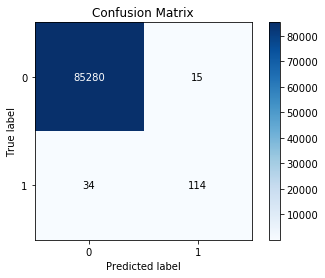

In [209]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_xg_test1)

In [210]:
# Let's check the overall accuracy.
print("XGBOOST TEST RESULTS:")
print("Accuracy_test:",round(metrics.accuracy_score(y_test,y_pred_xg_test1),2))

sensitivity_xg_test = round((confusion_xg_test[0,0]/(confusion_xg_test[0,0]+confusion_xg_test[0,1])),2)
print('Sensitivity/recall_test : ', sensitivity_xg_test )

specificity_xg_test = round((confusion_xg_test[1,1]/(confusion_xg_test[1,0]+confusion_xg_test[1,1])),2)
print('Specificity_test : ', specificity_xg_test)

print(classification_report(y_test, y_pred_xg_test1))

XGBOOST TEST RESULTS:
Accuracy_test: 1.0
Sensitivity/recall_test :  1.0
Specificity_test :  0.77
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.77      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [211]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xg[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 97.71%


#### XGBOOST with RANDOM OVERSAMPLING

In [222]:
X_ros = pd.DataFrame(data=X_ros, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [223]:
# fit model on training data with default hyperparameters
xg_model = XGBClassifier()
xg_model.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [224]:
X_ros.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.000407,1.445692,-0.179859,-0.825371,0.368105,-0.166829,-0.931864,0.056497,-0.301648,0.699190,...,-0.414862,-0.395420,-1.068621,0.586820,-0.175555,-0.707411,0.509951,-0.213389,-0.185933,-1.447489
1,0.490732,-0.168557,0.707716,-0.415595,-0.340794,0.741497,-0.589994,0.861925,-0.238026,-0.133497,...,0.107737,-0.442209,-1.036617,0.117042,1.000062,-0.756087,0.322004,0.576662,0.282991,-1.130777
2,0.779333,1.540551,0.059204,-1.397662,0.027795,0.595882,-1.129044,0.693398,-0.616503,0.062586,...,-0.178557,0.225184,0.839662,-0.056913,1.496788,0.975261,0.505386,-0.232174,-0.205412,-0.865022
3,-1.313086,-0.457140,-0.017893,1.329409,-0.598829,-0.273894,0.055891,-0.130663,0.084501,-1.799416,...,0.386509,0.202774,0.281492,-0.035562,-0.067283,-0.652138,-0.549520,0.285317,0.337156,-0.032385
4,1.242536,-0.500691,1.306810,-0.833279,0.786730,0.906110,-0.435205,0.910881,0.144093,-0.834615,...,0.029514,0.097412,0.491358,-0.416204,0.814595,0.136860,-0.826228,0.845486,0.693349,-0.689227


In [225]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_xg1 = xg_model.predict(X_test_pt)
y_pred_xg = xg_model.predict_proba(X_test_pt)
y_pred_xg[:10]

array([[0.82238734, 0.17761269],
       [0.8929946 , 0.1070054 ],
       [0.994522  , 0.00547804],
       [0.9943796 , 0.00562041],
       [0.9914595 , 0.00854052],
       [0.9925656 , 0.00743442],
       [0.99367934, 0.00632067],
       [0.98175263, 0.01824735],
       [0.9929243 , 0.00707572],
       [0.9919225 , 0.00807749]], dtype=float32)

In [226]:
confusion_xg = metrics.confusion_matrix(y_test,y_pred_xg1)
confusion_xg

array([[84842,   453],
       [   21,   127]], dtype=int64)

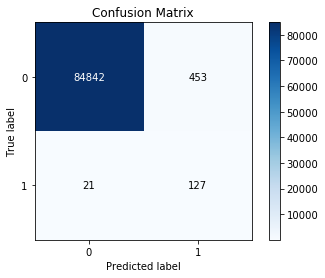

In [227]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xg1)

In [228]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xg[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 97.81%


In [229]:
# hyperparameter tuning with XGBoost
# GridSearchCV to find optimal min_samples_split

# creating a KFold object 
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3,0.7,0.9]
             }          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_xg = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc',n_iter = 5,
                        cv = kfolds.split(X_ros, y_ros), 
                        verbose = 0,random_state=1,
                        return_train_score=True)      

In [230]:
# fit the model
model_cv_xg.fit(X_ros, y_ros)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002140E8302A0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=2, min_child_weight=1,
                                           missing=None, n_estimators=200,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
        

In [231]:
# cv results
cv_results_xg = pd.DataFrame(model_cv_xg.cv_results_)
cv_results_xg

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,104.663649,4.311377,0.351962,0.007946,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.999931,0.999920,0.999948,...,0.999923,0.000020,5,0.999933,0.999935,0.999929,0.999938,0.999933,0.999934,3.044200e-06
1,102.609660,2.491168,0.359732,0.007950,0.7,0.2,"{'subsample': 0.7, 'learning_rate': 0.2}",0.999920,0.999932,0.999949,...,0.999926,0.000019,4,0.999934,0.999943,0.999928,0.999942,0.999946,0.999939,6.597839e-06
2,101.138817,3.484409,0.364564,0.010625,0.7,0.6,"{'subsample': 0.7, 'learning_rate': 0.6}",0.999993,1.000000,0.999989,...,0.999991,0.000006,1,1.000000,1.000000,1.000000,1.000000,0.999999,1.000000,4.260242e-07
3,81.930044,1.703555,0.344795,0.008304,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.999935,0.999919,0.999955,...,0.999927,0.000019,3,0.999942,0.999938,0.999932,0.999943,0.999932,0.999937,4.733681e-06
4,78.500046,0.858138,0.347754,0.008864,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.999990,0.999998,0.999976,...,0.999989,0.000010,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.861328e-07


In [232]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xg.best_score_,'using',model_cv_xg.best_params_)

We can get accuracy of 0.9999905999805033 using {'subsample': 0.7, 'learning_rate': 0.6}


In [233]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.7,
         'objective':'binary:logistic'}

In [234]:
# fit model on training data
xg_optimum = XGBClassifier(params = params)
xg_optimum.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.7},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [235]:
# predictions on TRAIN set
y_pred_xg_train1 = xg_optimum.predict(X_ros)
y_pred_xg_train = xg_optimum.predict_proba(X_ros)
y_pred_xg_train[:10]

array([[0.9962612 , 0.00373882],
       [0.9611932 , 0.03880679],
       [0.9953539 , 0.00464613],
       [0.9956696 , 0.00433042],
       [0.9652378 , 0.03476223],
       [0.99598527, 0.00401472],
       [0.8634448 , 0.13655517],
       [0.9957085 , 0.0042915 ],
       [0.8305863 , 0.16941369],
       [0.9987181 , 0.00128194]], dtype=float32)

In [236]:
# predictions on test set
y_pred_xg_test1 = xg_optimum.predict(X_test_pt)
y_pred_xg_test = xg_optimum.predict_proba(X_test_pt)
y_pred_xg_test[:10]

array([[0.82238734, 0.17761269],
       [0.8929946 , 0.1070054 ],
       [0.994522  , 0.00547804],
       [0.9943796 , 0.00562041],
       [0.9914595 , 0.00854052],
       [0.9925656 , 0.00743442],
       [0.99367934, 0.00632067],
       [0.98175263, 0.01824735],
       [0.9929243 , 0.00707572],
       [0.9919225 , 0.00807749]], dtype=float32)

In [237]:
# roc_auc train
auc_xg_train = metrics.roc_auc_score(y_ros, y_pred_xg_train[:, 1])

print("AUC: %.2f%%" % (auc_xg_train * 100.0))

AUC: 99.97%


In [238]:
confusion_xg_train = metrics.confusion_matrix(y_ros,y_pred_xg_train1 )
confusion_xg_train

array([[198039,    981],
       [     0, 199020]], dtype=int64)

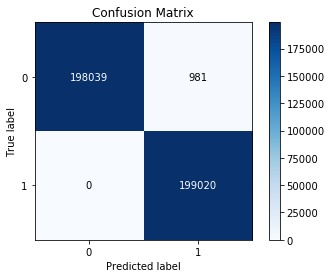

In [239]:
skplt.metrics.plot_confusion_matrix(y_ros,y_pred_xg_train1)

In [240]:
# Let's check the overall accuracy.
print("XGBOOST OVERSAMPLING TRAIN RESULTS:")
print("Accuracy_train:",round(metrics.accuracy_score(y_ros,y_pred_xg_train1),2))

sensitivity_xg_train = round((confusion_xg_train[0,0]/(confusion_xg_train[0,0]+confusion_xg_train[0,1])),2)
print('Sensitivity/recall_train : ', sensitivity_xg_train )

specificity_xg_train = round((confusion_xg_train[1,1]/(confusion_xg_train[1,0]+confusion_xg_train[1,1])),2)
print('Specificity_train : ', specificity_xg_train)

print(classification_report(y_ros, y_pred_xg_train1))

XGBOOST OVERSAMPLING TRAIN RESULTS:
Accuracy_train: 1.0
Sensitivity/recall_train :  1.0
Specificity_train :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [241]:
# roc_auc TEST
auc_xg_test = metrics.roc_auc_score(y_test, y_pred_xg_test[:, 1])

print("AUC: %.2f%%" % (auc_xg_test * 100.0))

AUC: 97.81%


In [242]:
confusion_xg_test = metrics.confusion_matrix(y_test,y_pred_xg_test1 )
confusion_xg_test

array([[84842,   453],
       [   21,   127]], dtype=int64)

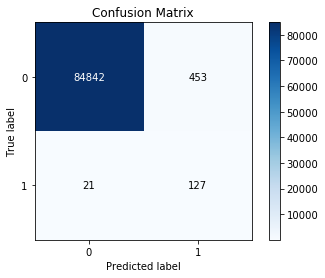

In [243]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_xg_test1)

In [244]:
# Let's check the overall accuracy.
print("XGBOOST OVERSAMPLING TEST RESULTS:")
print("Accuracy_test:",round(metrics.accuracy_score(y_test,y_pred_xg_test1),2))

sensitivity_xg_test = round((confusion_xg_test[0,0]/(confusion_xg_test[0,0]+confusion_xg_test[0,1])),2)
print('Sensitivity/recall_test : ', sensitivity_xg_test )

specificity_xg_test = round((confusion_xg_test[1,1]/(confusion_xg_test[1,0]+confusion_xg_test[1,1])),2)
print('Specificity_test : ', specificity_xg_test)

print(classification_report(y_test, y_pred_xg_test1))

XGBOOST OVERSAMPLING TEST RESULTS:
Accuracy_test: 0.99
Sensitivity/recall_test :  0.99
Specificity_test :  0.86
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.22      0.86      0.35       148

    accuracy                           0.99     85443
   macro avg       0.61      0.93      0.67     85443
weighted avg       1.00      0.99      1.00     85443



### XGBOOST with SMOTE

In [ ]:
X_smo = pd.DataFrame(data=X_smo, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [252]:
# fit model on training data with default hyperparameters
xg_model = XGBClassifier()
xg_model.fit(X_smo, y_smo)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [253]:

y_pred_xg1 = xg_model.predict(X_test_pt)
y_pred_xg = xg_model.predict_proba(X_test_pt)
y_pred_xg[:10]

array([[0.90344185, 0.09655813],
       [0.8106445 , 0.18935552],
       [0.99810123, 0.00189878],
       [0.9899833 , 0.01001669],
       [0.9778919 , 0.02210808],
       [0.9551517 , 0.04484832],
       [0.97162634, 0.02837366],
       [0.99119425, 0.00880573],
       [0.9920416 , 0.00795842],
       [0.9948914 , 0.0051086 ]], dtype=float32)

In [254]:
confusion_xg = metrics.confusion_matrix(y_test,y_pred_xg1)
confusion_xg

array([[84438,   857],
       [   19,   129]], dtype=int64)

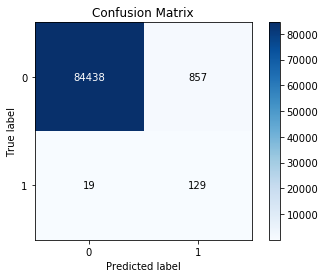

In [255]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xg1)

In [256]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xg[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.12%


In [257]:
# hyperparameter tuning with XGBoost
# GridSearchCV to find optimal min_samples_split

# creating a KFold object 
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3,0.7,0.9]
             }          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_xg = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc',n_iter = 5,
                        cv = kfolds.split(X_smo, y_smo), 
                        verbose = 0,random_state=1,
                        return_train_score=True)      

In [258]:
# fit the model
model_cv_xg.fit(X_smo, y_smo)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002140E914750>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=2, min_child_weight=1,
                                           missing=None, n_estimators=200,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
        

In [263]:
# cv results
cv_results_xg = pd.DataFrame(model_cv_xg.cv_results_)
cv_results_xg

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,271.980784,8.579243,0.823249,0.009879,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.999717,0.999669,0.999705,...,0.999689,0.000031,5,0.999731,0.999720,0.999699,0.999753,0.999724,0.999725,0.000017
1,252.848459,1.066862,0.808269,0.003738,0.7,0.2,"{'subsample': 0.7, 'learning_rate': 0.2}",0.999713,0.999684,0.999727,...,0.999698,0.000033,4,0.999724,0.999731,0.999723,0.999754,0.999733,0.999733,0.000011
2,253.297578,0.143857,0.824413,0.002739,0.7,0.6,"{'subsample': 0.7, 'learning_rate': 0.6}",0.999949,0.999968,0.999957,...,0.999958,0.000006,2,0.999985,0.999981,0.999982,0.999985,0.999982,0.999983,0.000001
3,196.464786,1.989534,0.807591,0.009956,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.999714,0.999692,0.999740,...,0.999705,0.000035,3,0.999734,0.999740,0.999729,0.999755,0.999731,0.999738,0.000009
4,206.119355,130.472202,0.580597,0.211333,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.999965,0.999969,0.999960,...,0.999959,0.000009,1,0.999983,0.999976,0.999985,0.999983,0.999981,0.999982,0.000003


In [264]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xg.best_score_,'using',model_cv_xg.best_params_)

We can get accuracy of 0.9999594673784975 using {'subsample': 0.3, 'learning_rate': 0.6}


In [265]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.7,
         'objective':'binary:logistic'}

In [266]:
# fit model on training data
xg_optimum = XGBClassifier(params = params)
xg_optimum.fit(X_smo, y_smo)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.7},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [267]:
# predictions on TRAIN set
y_pred_xg_train1 = xg_optimum.predict(X_smo)
y_pred_xg_train = xg_optimum.predict_proba(X_smo)
y_pred_xg_train[:10]

array([[0.99881387, 0.00118612],
       [0.9519165 , 0.04808348],
       [0.9972418 , 0.0027582 ],
       [0.9899963 , 0.01000371],
       [0.94570625, 0.05429374],
       [0.99599683, 0.00400319],
       [0.8978721 , 0.1021279 ],
       [0.9909573 , 0.00904269],
       [0.76701534, 0.23298466],
       [0.997944  , 0.00205599]], dtype=float32)

In [268]:
# predictions on test set
y_pred_xg_test1 = xg_optimum.predict(X_test_pt)
y_pred_xg_test = xg_optimum.predict_proba(X_test_pt)
y_pred_xg_test[:10]

array([[0.90344185, 0.09655813],
       [0.8106445 , 0.18935552],
       [0.99810123, 0.00189878],
       [0.9899833 , 0.01001669],
       [0.9778919 , 0.02210808],
       [0.9551517 , 0.04484832],
       [0.97162634, 0.02837366],
       [0.99119425, 0.00880573],
       [0.9920416 , 0.00795842],
       [0.9948914 , 0.0051086 ]], dtype=float32)

In [269]:
# roc_auc train
auc_xg_train = metrics.roc_auc_score(y_smo, y_pred_xg_train[:, 1])

print("AUC: %.2f%%" % (auc_xg_train * 100.0))

AUC: 99.91%


In [270]:
confusion_xg_train = metrics.confusion_matrix(y_smo,y_pred_xg_train1 )
confusion_xg_train

array([[196928,   2092],
       [  4387, 194633]], dtype=int64)

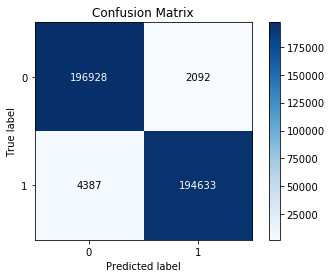

In [271]:
skplt.metrics.plot_confusion_matrix(y_smo,y_pred_xg_train1)

In [272]:
# Let's check the overall accuracy.
print("XGBOOST SMOTE TRAIN RESULTS:")
print("Accuracy_train:",round(metrics.accuracy_score(y_smo,y_pred_xg_train1),2))

sensitivity_xg_train = round((confusion_xg_train[0,0]/(confusion_xg_train[0,0]+confusion_xg_train[0,1])),2)
print('Sensitivity/recall_train : ', sensitivity_xg_train )

specificity_xg_train = round((confusion_xg_train[1,1]/(confusion_xg_train[1,0]+confusion_xg_train[1,1])),2)
print('Specificity_train : ', specificity_xg_train)

print(classification_report(y_smo, y_pred_xg_train1))

XGBOOST SMOTE TRAIN RESULTS:
Accuracy_train: 0.98
Sensitivity/recall_train :  0.99
Specificity_train :  0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    199020
           1       0.99      0.98      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040



In [273]:
# roc_auc TEST
auc_xg_test = metrics.roc_auc_score(y_test, y_pred_xg_test[:, 1])

print("AUC: %.2f%%" % (auc_xg_test * 100.0))

AUC: 98.12%


In [274]:
confusion_xg_test = metrics.confusion_matrix(y_test,y_pred_xg_test1 )
confusion_xg_test

array([[84438,   857],
       [   19,   129]], dtype=int64)

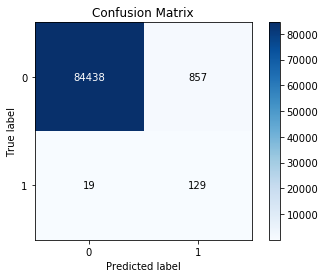

In [275]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_xg_test1)

In [276]:
# Let's check the overall accuracy.
print("XGBOOST SMOTE TEST RESULTS:")
print("Accuracy_test:",round(metrics.accuracy_score(y_test,y_pred_xg_test1),2))

sensitivity_xg_test = round((confusion_xg_test[0,0]/(confusion_xg_test[0,0]+confusion_xg_test[0,1])),2)
print('Sensitivity/recall_test : ', sensitivity_xg_test )

specificity_xg_test = round((confusion_xg_test[1,1]/(confusion_xg_test[1,0]+confusion_xg_test[1,1])),2)
print('Specificity_test : ', specificity_xg_test)

print(classification_report(y_test, y_pred_xg_test1))

XGBOOST SMOTE TEST RESULTS:
Accuracy_test: 0.99
Sensitivity/recall_test :  0.99
Specificity_test :  0.87
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.87      0.23       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443



### XGBOOST with ADASYN

In [278]:
X_ada = pd.DataFrame(data=X_ada, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [279]:
# fit model on training data with default hyperparameters
xg_model = XGBClassifier()
xg_model.fit(X_ada, y_ada)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [280]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_xg1 = xg_model.predict(X_test_pt)
y_pred_xg = xg_model.predict_proba(X_test_pt)
y_pred_xg[:10]

array([[0.9036218 , 0.09637821],
       [0.5327974 , 0.4672026 ],
       [0.9986137 , 0.0013863 ],
       [0.98386526, 0.01613476],
       [0.9718554 , 0.02814463],
       [0.95354116, 0.04645882],
       [0.9571222 , 0.04287776],
       [0.9871881 , 0.0128119 ],
       [0.9849725 , 0.01502752],
       [0.99280506, 0.00719492]], dtype=float32)

In [281]:
confusion_xg = metrics.confusion_matrix(y_test,y_pred_xg1)
confusion_xg

array([[82603,  2692],
       [   17,   131]], dtype=int64)

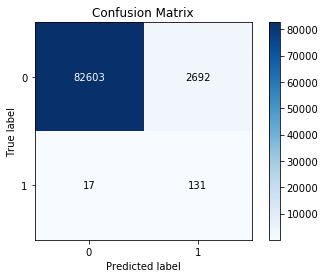

In [282]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xg1)

In [283]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xg[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 97.86%


#### Lets tune the hyperparameters using stratified k-fold cv and find the optimal hyperparameters using grid search cv

In [285]:
# hyperparameter tuning with XGBoost
# GridSearchCV to find optimal min_samples_split

# creating a KFold object 
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3,0.7,0.9]
             }          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_xg = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc',n_iter = 5,
                        cv = kfolds.split(X_ada, y_ada), 
                        verbose = 0,random_state=1,
                        return_train_score=True)   

In [286]:
# fit the model
model_cv_xg.fit(X_ada, y_ada)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002140E830D68>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=2, min_child_weight=1,
                                           missing=None, n_estimators=200,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
        

In [287]:
# cv results
cv_results_xg = pd.DataFrame(model_cv_xg.cv_results_)
cv_results_xg

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,115.650188,4.996171,0.305835,0.005922,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.999079,0.999007,0.999253,...,0.999108,0.000115,5,0.999122,0.999157,0.999155,0.999190,0.999195,0.999164,0.000026
1,111.610135,0.370739,0.308282,0.005606,0.7,0.2,"{'subsample': 0.7, 'learning_rate': 0.2}",0.999209,0.999017,0.999279,...,0.999143,0.000114,4,0.999264,0.999168,0.999194,0.999266,0.999160,0.999210,0.000046
2,109.343828,2.359601,0.307072,0.007730,0.7,0.6,"{'subsample': 0.7, 'learning_rate': 0.6}",0.999910,0.999938,0.999925,...,0.999897,0.000040,1,0.999956,0.999955,0.999942,0.999951,0.999963,0.999953,0.000007
3,78.169172,1.150623,0.280190,0.011238,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.999141,0.999079,0.999270,...,0.999152,0.000075,3,0.999212,0.999195,0.999178,0.999269,0.999180,0.999207,0.000033
4,78.522636,0.321131,0.312495,0.018927,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.999907,0.999924,0.999895,...,0.999890,0.000025,2,0.999931,0.999935,0.999954,0.999938,0.999951,0.999942,0.000009


In [288]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xg.best_score_,'using',model_cv_xg.best_params_)

We can get accuracy of 0.9998972068277766 using {'subsample': 0.7, 'learning_rate': 0.6}


In [67]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.7,
         'objective':'binary:logistic'}

In [68]:
# fit model on training data
xg_optimum = XGBClassifier(params = params)
xg_ada_res = xg_optimum.fit(X_ada, y_ada)

In [71]:
# predictions on TRAIN set
y_pred_xg_train1 = xg_optimum.predict(X_ada)
y_pred_xg_train = xg_optimum.predict_proba(X_ada)
y_pred_xg_train[:10]

array([[0.998752  , 0.00124801],
       [0.94503254, 0.05496748],
       [0.99748546, 0.00251453],
       [0.9730596 , 0.0269404 ],
       [0.80414677, 0.19585322],
       [0.99379224, 0.00620778],
       [0.56630325, 0.43369678],
       [0.9808144 , 0.01918559],
       [0.6351557 , 0.36484432],
       [0.9985631 , 0.00143688]], dtype=float32)

In [86]:
# predictions on test set
y_pred_xg_test1 = xg_optimum.predict(X_test_pt)
y_pred_xg_test = xg_optimum.predict_proba(X_test_pt)
y_pred_xg_test[:10]

array([[0.9373413 , 0.06265873],
       [0.5135431 , 0.48645687],
       [0.9986877 , 0.00131233],
       [0.9841569 , 0.01584309],
       [0.9738853 , 0.02611468],
       [0.9531644 , 0.04683559],
       [0.9557484 , 0.04425164],
       [0.9865653 , 0.01343472],
       [0.9867418 , 0.01325819],
       [0.9923077 , 0.00769225]], dtype=float32)

In [90]:
# roc_auc train
auc_xg_train = metrics.roc_auc_score(y_ada, y_pred_xg_train1)

print("AUC: %.2f%%" % (auc_xg_train * 100.0))

AUC: 98.09%


In [58]:
confusion_xg_train = metrics.confusion_matrix(y_ada,y_pred_xg_train1 )
confusion_xg_train

array([[192899,   6121],
       [  1472, 197511]])

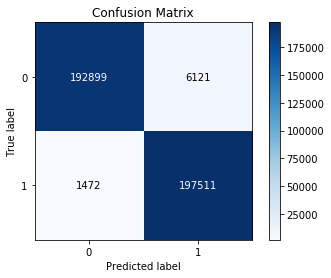

In [60]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_ada,y_pred_xg_train1)

In [61]:
# Let's check the overall accuracy.
print("XGBOOST ADASYN TRAIN RESULTS:")
print("Accuracy_train:",round(metrics.accuracy_score(y_ada,y_pred_xg_train1),2))

sensitivity_xg_train = round((confusion_xg_train[0,0]/(confusion_xg_train[0,0]+confusion_xg_train[0,1])),2)
print('Sensitivity/recall_train : ', sensitivity_xg_train )

specificity_xg_train = round((confusion_xg_train[1,1]/(confusion_xg_train[1,0]+confusion_xg_train[1,1])),2)
print('Specificity_train : ', specificity_xg_train)

print(classification_report(y_ada, y_pred_xg_train1))

XGBOOST ADASYN TRAIN RESULTS:
Accuracy_train: 0.98
Sensitivity/recall_train :  0.97
Specificity_train :  0.99
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    199020
           1       0.97      0.99      0.98    198983

    accuracy                           0.98    398003
   macro avg       0.98      0.98      0.98    398003
weighted avg       0.98      0.98      0.98    398003



In [95]:
# roc_auc TEST
auc_xg_test = metrics.roc_auc_score(y_test, y_pred_xg_test[:, 1])

print("AUC: %.2f%%" % (auc_xg_test * 100.0))

AUC: 97.90%


In [63]:
confusion_xg_test = metrics.confusion_matrix(y_test,y_pred_xg_test1 )
confusion_xg_test

array([[82692,  2603],
       [   15,   133]])

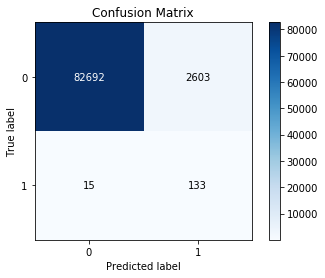

In [64]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_xg_test1)

In [65]:
# Let's check the overall accuracy.
print("XGBOOST ADASYN TEST RESULTS:")
print("Accuracy_test:",round(metrics.accuracy_score(y_test,y_pred_xg_test1),2))

sensitivity_xg_test = round((confusion_xg_test[0,0]/(confusion_xg_test[0,0]+confusion_xg_test[0,1])),2)
print('Sensitivity/recall_test : ', sensitivity_xg_test )

specificity_xg_test = round((confusion_xg_test[1,1]/(confusion_xg_test[1,0]+confusion_xg_test[1,1])),2)
print('Specificity_test : ', specificity_xg_test)

print(classification_report(y_test, y_pred_xg_test1))

XGBOOST ADASYN TEST RESULTS:
Accuracy_test: 0.97
Sensitivity/recall_test :  0.97
Specificity_test :  0.9
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.90      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



### SVM without sampling

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [307]:
# fit model on training data with default hyperparameters
svm_model = SVC(kernel= 'linear',random_state=42)
svm_model.fit(X_train_pt, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [308]:
# Predictions on TRAIN set:
ytrain_pred_svm = svm_model.predict(X_train_pt)
metrics.roc_auc_score(y_train,ytrain_pred_svm)

0.9024931758640594

In [309]:
#Applying 5 fold cross validation
roc = cross_val_score(estimator = svm_model, X=X_train_pt, y = y_train.ravel(), cv = 5, scoring='roc_auc')

In [310]:
mean_roc= roc.mean()*100
std_roc = roc.std()*100
print("The mean roc in %: ", roc.mean()*100)
print("The standard deviation in % ", roc.std()*100)
print("The roc_auc of our model in % is betweeen {} and {}".format(mean_roc-std_roc, mean_roc+std_roc))

The mean roc in %:  97.10841253000744
The standard deviation in %  1.685713410610414
The roc_auc of our model in % is betweeen 95.42269911939702 and 98.79412594061786


In [311]:
# Predictions on TRAIN set:
ytrain_pred_svm = svm_model.predict(X_train_pt)

In [312]:
confusion_train_svm = metrics.confusion_matrix(y_train,ytrain_pred_svm)
confusion_train_svm

array([[198971,     49],
       [    67,    277]], dtype=int64)

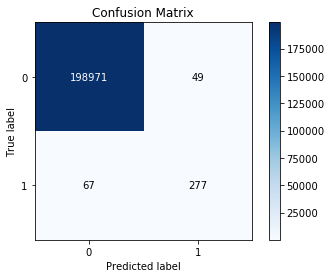

In [313]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,ytrain_pred_svm)

In [314]:
TP_tr_svm = confusion_train_svm[1,1] # true positive 
TN_tr_svm = confusion_train_svm[0,0] # true negatives
FP_tr_svm = confusion_train_svm[0,1] # false positives
FN_tr_svm = confusion_train_svm[1,0] # false negatives

In [315]:
# Let's check the overall accuracy.
acc_tr_svm = round(metrics.accuracy_score(y_train,ytrain_pred_svm),2)
print("Accuracy_tr_svm:",acc_tr_svm)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_svm = round(TP_tr_svm / float(TP_tr_svm+FN_tr_svm),2)
print("Sensitivity/recall_tr_svm:",Sensitivity_recall_tr_svm)

# Let us calculate specificity
Specificity_tr_svm = round(TN_tr_svm / float(TN_tr_svm +FP_tr_svm),2)
print("Specificity_tr_svm:",Specificity_tr_svm)

# Calculate false postive rate - predicting FRAUD when THEY ARE NOT FRAUD
FPR_tr_svm = round(FP_tr_svm/ float(TN_tr_svm +FP_tr_svm),2)
print("FPR_tr_svm:",FPR_tr_svm)

# Positive predictive value/Precision 
Precision_ppv_tr_svm = round(TP_tr_svm / float(TP_tr_svm+FP_tr_svm),2)
print("Precision/positive predictive value_tr_svm:",Precision_ppv_tr_svm)

# Negative predictive value
npv_tr_svm= round(TN_tr_svm / float(TN_tr_svm + FN_tr_svm),2)
print("Neg predictive value_tr_svm:",npv_tr_svm)

#ROC
AUC_ROC_tr_svm = round(metrics.roc_auc_score(y_train,ytrain_pred_svm),2)
print("AUC_ROC_tr_svm:",AUC_ROC_tr_svm)

Accuracy_tr_svm: 1.0
Sensitivity/recall_tr_svm: 0.81
Specificity_tr_svm: 1.0
FPR_tr_svm: 0.0
Precision/positive predictive value_tr_svm: 0.85
Neg predictive value_tr_svm: 1.0
AUC_ROC_tr_svm: 0.9


In [316]:
print(classification_report(y_train,ytrain_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.85      0.81      0.83       344

    accuracy                           1.00    199364
   macro avg       0.92      0.90      0.91    199364
weighted avg       1.00      1.00      1.00    199364



In [317]:
# Predictions on test set:
y_pred_svm = svm_model.predict(X_test_pt)

In [318]:
confusion_svm = metrics.confusion_matrix(y_test,y_pred_svm)
confusion_svm

array([[85264,    31],
       [   32,   116]], dtype=int64)

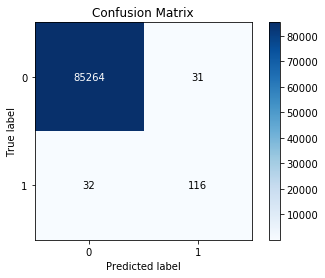

In [319]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_svm)

In [320]:
TP_svm = confusion_svm[1,1] # true positive 
TN_svm = confusion_svm[0,0] # true negatives
FP_svm = confusion_svm[0,1] # false positives
FN_svm = confusion_svm[1,0] # false negatives

In [321]:
# Let's check the overall accuracy.
acc_svm = round(metrics.accuracy_score(y_test,y_pred_svm),2)
print("Accuracy_svm:",acc_svm)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_svm = round(TP_svm / float(TP_svm+FN_svm),2)
print("Sensitivity/recall_svm:",Sensitivity_recall_svm)

# Let us calculate specificity
Specificity_svm = round(TN_svm / float(TN_svm +FP_svm),2)
print("Specificity_svm:",Specificity_svm)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_svm = round(FP_svm/ float(TN_svm +FP_svm),2)
print("FPR_svm:",FPR_svm)

# Positive predictive value/Precision 
Precision_ppv_svm = round(TP_svm / float(TP_svm+FP_svm),2)
print("Precision/positive predictive value_svm:",Precision_ppv_svm)

# Negative predictive value
npv_svm= round(TN_svm / float(TN_svm + FN_svm),2)
print("Neg predictive value_svm:",npv_svm)

#ROC
AUC_ROC_svm = round(metrics.roc_auc_score(y_test,y_pred_svm),2)
print("AUC_ROC_svm:",AUC_ROC_svm)

Accuracy_svm: 1.0
Sensitivity/recall_svm: 0.78
Specificity_svm: 1.0
FPR_svm: 0.0
Precision/positive predictive value_svm: 0.79
Neg predictive value_svm: 1.0
AUC_ROC_svm: 0.89


In [322]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.78      0.79       148

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



### SVM with SMOTE

In [51]:
# fit model on training data with default hyperparameters
svm_model = SVC(kernel= 'linear',random_state=42)
svm_model.fit(X_smo, y_smo)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
# Predictions on TRAIN set:
ytrain_pred_svm = svm_model.predict(X_smo)

In [55]:
metrics.roc_auc_score(y_smo,ytrain_pred_svm)

0.9518164003617727

In [58]:
confusion_train_svm = metrics.confusion_matrix(y_smo,ytrain_pred_svm)
confusion_train_svm

array([[194328,   4692],
       [ 14487, 184533]], dtype=int64)

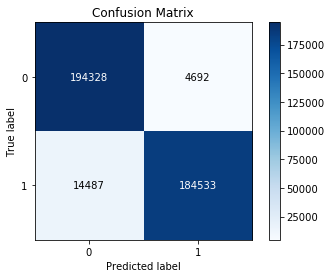

In [63]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_smo,ytrain_pred_svm)

In [64]:
TP_tr_svm = confusion_train_svm[1,1] # true positive 
TN_tr_svm = confusion_train_svm[0,0] # true negatives
FP_tr_svm = confusion_train_svm[0,1] # false positives
FN_tr_svm = confusion_train_svm[1,0] # false negatives

In [65]:
# Let's check the overall accuracy.
acc_tr_svm = round(metrics.accuracy_score(y_smo,ytrain_pred_svm),2)
print("Accuracy_tr_svm:",acc_tr_svm)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_tr_svm = round(TP_tr_svm / float(TP_tr_svm+FN_tr_svm),2)
print("Sensitivity/recall_tr_svm:",Sensitivity_recall_tr_svm)

# Let us calculate specificity
Specificity_tr_svm = round(TN_tr_svm / float(TN_tr_svm +FP_tr_svm),2)
print("Specificity_tr_svm:",Specificity_tr_svm)

# Calculate false postive rate - predicting FRAUD when THEY ARE NOT FRAUD
FPR_tr_svm = round(FP_tr_svm/ float(TN_tr_svm +FP_tr_svm),2)
print("FPR_tr_svm:",FPR_tr_svm)

# Positive predictive value/Precision 
Precision_ppv_tr_svm = round(TP_tr_svm / float(TP_tr_svm+FP_tr_svm),2)
print("Precision/positive predictive value_tr_svm:",Precision_ppv_tr_svm)

# Negative predictive value
npv_tr_svm= round(TN_tr_svm / float(TN_tr_svm + FN_tr_svm),2)
print("Neg predictive value_tr_svm:",npv_tr_svm)

#ROC
AUC_ROC_tr_svm = round(metrics.roc_auc_score(y_smo,ytrain_pred_svm),2)
print("AUC_ROC_tr_svm:",AUC_ROC_tr_svm)

Accuracy_tr_svm: 0.95
Sensitivity/recall_tr_svm: 0.93
Specificity_tr_svm: 0.98
FPR_tr_svm: 0.02
Precision/positive predictive value_tr_svm: 0.98
Neg predictive value_tr_svm: 0.93
AUC_ROC_tr_svm: 0.95


In [66]:
print(classification_report(y_smo,ytrain_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    199020
           1       0.98      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040



In [67]:
# Predictions on test set:
y_pred_svm = svm_model.predict(X_test_pt)

In [68]:
confusion_svm = metrics.confusion_matrix(y_test,y_pred_svm)
confusion_svm

array([[83323,  1972],
       [   16,   132]], dtype=int64)

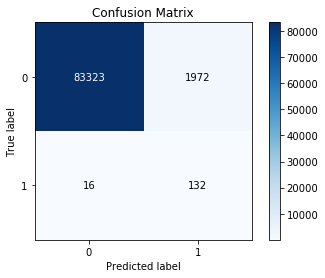

In [69]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_svm)

In [70]:
TP_svm = confusion_svm[1,1] # true positive 
TN_svm = confusion_svm[0,0] # true negatives
FP_svm = confusion_svm[0,1] # false positives
FN_svm = confusion_svm[1,0] # false negatives

In [71]:
# Let's check the overall accuracy.
acc_svm = round(metrics.accuracy_score(y_test,y_pred_svm),2)
print("Accuracy_svm:",acc_svm)

# Let's see the sensitivity/recall of our logistic regression model
Sensitivity_recall_svm = round(TP_svm / float(TP_svm+FN_svm),2)
print("Sensitivity/recall_svm:",Sensitivity_recall_svm)

# Let us calculate specificity
Specificity_svm = round(TN_svm / float(TN_svm +FP_svm),2)
print("Specificity_svm:",Specificity_svm)

# Calculate false postive rate - predicting churn when customer does not have churned
FPR_svm = round(FP_svm/ float(TN_svm +FP_svm),2)
print("FPR_svm:",FPR_svm)

# Positive predictive value/Precision 
Precision_ppv_svm = round(TP_svm / float(TP_svm+FP_svm),2)
print("Precision/positive predictive value_svm:",Precision_ppv_svm)

# Negative predictive value
npv_svm= round(TN_svm / float(TN_svm + FN_svm),2)
print("Neg predictive value_svm:",npv_svm)

#ROC
AUC_ROC_svm = round(metrics.roc_auc_score(y_test,y_pred_svm),2)
print("AUC_ROC_svm:",AUC_ROC_svm)

Accuracy_svm: 0.98
Sensitivity/recall_svm: 0.89
Specificity_svm: 0.98
FPR_svm: 0.02
Precision/positive predictive value_svm: 0.06
Neg predictive value_svm: 1.0
AUC_ROC_svm: 0.93


In [72]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



## RESULT

- We have consolidated all the metrics from above algorithms for all the techniques (unbalanced, random oversampling, smote and adasyn)

In [93]:
### TRAIN RESULTS CONSOLIDATION:
import pandas as pd
train_results = [['Logistic_nosampling',0.81,0.62,1.00,0.91,1.00],
                 ['Logistic_ROS',0.95,0.93,0.97,0.97,0.95],
                 ['Logistic_SMOTE',0.95,0.93,0.97,0.97,0.95],
                 ['Logistic_ADASYN',0.90,0.88,0.98,0.91,0.90],
                 ['DecisionTree_nosampling',0.84,0.69,1.00,0.97,1.00],
                 ['DecisionTree_ROS',0.99,0.99,0.99,0.99,0.99],
                 ['DecisionTree_SMOTE',0.99,0.99,0.99,0.99,0.99],
                 ['DecisionTree_ADASYN',0.96,0.97,0.95,0.95,0.96],
                 ['Randomforest_nosampling',0.99,0.97,1.00,0.69,1.00],
                 ['Randomforest_ROS',1.00,1.00,1.00,1.00,1.00],
                 ['Randomforest_SMOTE',0.99,0.99,1.00,1.00,0.99],
                 ['Randomforest_ADASYN',0.99,1.00,0.99,0.99,0.99],
                 ['SVM_nosampling',0.90,0.88,1.00,0.85,1.00],
                 ['SVM_SMOTE',0.95,0.93,0.98,0.98,0.95],
                 ['Xgboost_nosampling',0.99,0.83,0.83,0.98,1.00],
                 ['Xgboost_ROS',0.99,1.00,1.00,1.00,1.00],
                 ['Xgboost_SMOTE',0.99,0.98,0.98,0.99,0.98],
                 ['Xgboost_ADASYN',0.98,0.99,0.99,0.98,0.98]
                   ]

train_results_df = pd.DataFrame(train_results,columns = ['Model Name','Area under ROC curve','Sensitivity or Recall',
                                                               'Specificity','Precision','Accuracy'])
train_results_df

,Model Name,Area under ROC curve,Sensitivity or Recall,Specificity,Precision,Accuracy
0,Logistic_nosampling,0.81,0.62,1.00,0.91,1.00
1,Logistic_ROS,0.95,0.93,0.97,0.97,0.95
2,Logistic_SMOTE,0.95,0.93,0.97,0.97,0.95
3,Logistic_ADASYN,0.90,0.88,0.98,0.91,0.90
4,DecisionTree_nosampling,0.84,0.69,1.00,0.97,1.00
5,DecisionTree_ROS,0.99,0.99,0.99,0.99,0.99
6,DecisionTree_SMOTE,0.99,0.99,0.99,0.99,0.99
7,DecisionTree_ADASYN,0.96,0.97,0.95,0.95,0.96
8,Randomforest_nosampling,0.99,0.97,1.00,0.69,1.00
9,Randomforest_ROS,1.00,1.00,1.00,1.00,1.00


In [2]:
### TEST RESULTS CONSOLIDATION:

test_results = [['Logistic_nosampling',0.77,0.54,1.00,0.84,1.00],
                 ['Logistic_ROS',0.93,0.89,0.98,0.06,0.98],
                 ['Logistic_SMOTE',0.93,0.89,0.97,0.06,0.97],
                 ['Logistic_ADASYN',0.93,0.94,0.92,0.02,0.92],
                 ['DecisionTree_nosampling',0.85,0.72,1.00,0.71,0.92],
                 ['DecisionTree_ROS',0.91,0.84,0.99,0.16,0.99],
                 ['DecisionTree_SMOTE',0.92,0.86,0.99,0.09,0.98],
                 ['DecisionTree_ADASYN',0.91,0.88,0.95,0.03,0.95],
                 ['Randomforest_nosampling',0.93,0.86,1.00,0.64,0.99],
                 ['Randomforest_ROS',0.93,0.86,1.00,0.56,0.99],
                 ['Randomforest_SMOTE',0.93,0.86,1.00,0.36,0.99],
                 ['Randomforest_ADASYN',0.93,0.87,0.99,0.14,0.99],
                 ['SVM_nosampling',0.89,0.78,1.00,0.79,1.00],
                 ['SVM_SMOTE',0.93,0.89,0.98,0.06,0.98],
                 ['Xgboost_nosampling',0.97,0.77,0.77,0.88,1.00],
                 ['Xgboost_ROS',0.97,0.86,0.86,0.22,0.99],
                 ['Xgboost_SMOTE',0.98,0.87,0.99,0.13,0.99],
                 ['Xgboost_ADASYN',0.98,0.90,0.90,0.05,0.97]
                   ]

test_results_df = pd.DataFrame(test_results,columns = ['Model Name','Area under ROC curve','Sensitivity or Recall',
                                                               'Specificity','Precision','Accuracy'])
test_results_df

,Model Name,Area under ROC curve,Sensitivity or Recall,Specificity,Precision,Accuracy
0,Logistic_nosampling,0.77,0.54,1.00,0.84,1.00
1,Logistic_ROS,0.93,0.89,0.98,0.06,0.98
2,Logistic_SMOTE,0.93,0.89,0.97,0.06,0.97
3,Logistic_ADASYN,0.93,0.94,0.92,0.02,0.92
4,DecisionTree_nosampling,0.85,0.72,1.00,0.71,0.92
5,DecisionTree_ROS,0.91,0.84,0.99,0.16,0.99
6,DecisionTree_SMOTE,0.92,0.86,0.99,0.09,0.98
7,DecisionTree_ADASYN,0.91,0.88,0.95,0.03,0.95
8,Randomforest_nosampling,0.93,0.86,1.00,0.64,0.99
9,Randomforest_ROS,0.93,0.86,1.00,0.56,0.99


- As detecting the fraud transactions is the main business goal, we will look into Area under ROC curve as the main metric
- We want to detect all the fraud transaction to help business save their customers, hence sensitivity/recall is the main metric, followed by precision

- XGBOOST gives best results on unbalanced dataset
- XGBOOST gives best results on dataset balanced with oversampling, followed by logistic, decision tree and randomforest
- XGBOOST gives best results with SMOTE TECHNIQUE
- XGBOOST gives best results on dataset balanced using ADASYN technique, followed by logistic.

- When we try to compare the best balancing technique among random oversampling, SMOTE and ADASYN - SMOTE AND ADASYB GAVE better results
- recall is higher for adasyn technique when compared to smote across all models

- BAsed on comparisons of all the models, XGBOOST using ADASYN is the best model as its giving highest AUC_ROC compared to other models, followed by XGBOOST WITH SMOTE and then logistic regression with adasyn technique as it gives highest recall(0.94) among all models

### Print the important features of the best model to understand the dataset

In [67]:
### Print the important features of the best model to understand the dataset

# extracting features
importances_xg = xg_optimum.feature_importances_
col_names =  X_ada.columns

sorted_feature_importance_xg = pd.DataFrame(sorted(zip(importances_xg, list(col_names)), reverse=True))
sorted_feature_importance_xg.head

<bound method NDFrame.head of            0       1
0   0.162434      V4
1   0.129089     V14
2   0.052708      V7
3   0.050131     V12
4   0.047192     V11
5   0.047022      V8
6   0.037920     V18
7   0.032652  Amount
8   0.031720      V3
9   0.031268     V27
10  0.029463      V5
11  0.029359      V1
12  0.026253      V9
13  0.024609     V28
14  0.024135     V13
15  0.022400     V25
16  0.021560     V17
17  0.020833      V2
18  0.020652     V10
19  0.020123     V22
20  0.018390     V19
21  0.018356      V6
22  0.017676     V21
23  0.017209     V23
24  0.016540     V24
25  0.015667     V20
26  0.011826    Time
27  0.008036     V16
28  0.007510     V26
29  0.007266     V15>

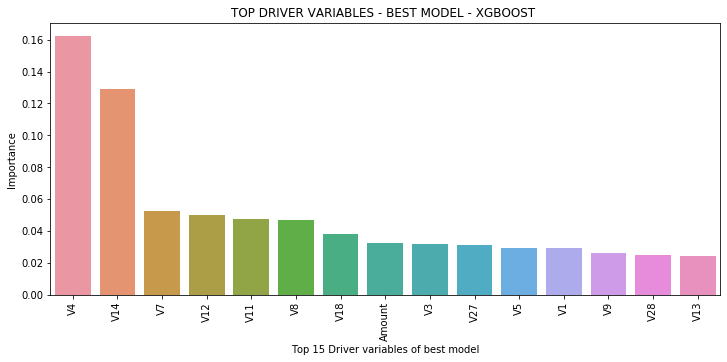

In [68]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x = 1,y=0,data = sorted_feature_importance_xg.head(15))
ax.set(xlabel = 'Top 15 Driver variables of best model', ylabel = 'Importance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("TOP DRIVER VARIABLES - BEST MODEL - XGBOOST ")
plt.show()

- Above are the top driver variables
- We are not in position to derive insights from the driver variables as they are all PCA transformed for confendiatiality of customers
- It will give us better picture, if the variables are not PCA transfomed

-  We conclude that XGBOOST with adasyn outperforms the other model in detecting fraudulant tranaction with an AUC of 98% and recall of 90%
- XGboost with smote also gives AUC of 98% and recall of 87%. 
- AS RECALL of adasyn is more than smote, we are choosing XGBOOST with ADASYN as best model
- Logistic regression with adasyn technique gives highes recall among all models with around 94% recall.

## ***END***